Задачи:

1.Табела од недост. за мерна станица по година <br>
2.ПМ10 вредности по ден од недела <br>
3.2016 има и Temperature+Humidity може има некои корелации таму	<br>
4.ПМ2.5 како функција од ПМ10, со избор на најдобар степен на функција <br>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [2]:
opstina=['GaziBaba','Karpos','Lisice','Rektorat','Centar']

# DATA ENTRIES


In [3]:
column_names=['StationName', 'DateTime', 'Data','Type']

In [5]:
body = client_5cd7f4b5da084e44a01840c358001f06.get_object(Bucket='aircare-donotdelete-pr-6veis12auc564p',Key='izbrani 2016.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2016 = pd.read_excel(io.BytesIO(body.read()))
df2016.head()


,StationName,DateTime,Data,Type,Temperature,Humidity,WindSpeed,Percipitation
0,Centar,2016-01-01 00:00:00,75.11,PM10,-9.57,0.53,1.0,NaN
1,GaziBaba,2016-01-01 00:00:00,136.52,PM10,-9.57,0.53,1.0,NaN
2,Karpos,2016-01-01 00:00:00,82.48,PM10,-9.57,0.53,1.0,NaN
3,Lisice,2016-01-01 00:00:00,341.78,PM10,-9.57,0.53,1.0,NaN
4,Rektorat,2016-01-01 00:00:00,75.77,PM10,-9.57,0.53,1.0,NaN


In [7]:
body = client_5cd7f4b5da084e44a01840c358001f06.get_object(Bucket='aircare-donotdelete-pr-6veis12auc564p',Key='izbrani 2017.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2017 = pd.read_excel(io.BytesIO(body.read()))
df2017.head()


,StationName,DateTime,Data,Type,Temperature,Humidity,WindSpeed,Percipitation
0,Karpos,2017-01-01 00:00:00,87.04,PM10,-5.81,0.67,1.69,NaN
1,Karpos,2017-01-01 00:00:00,69.28,PM25,-5.81,0.67,1.69,NaN
2,Karpos,2017-01-01 00:00:00,0.73,CO,-5.81,0.67,1.69,NaN
3,Karpos,2017-01-01 00:00:00,27.91,NO2,-5.81,0.67,1.69,NaN
4,Karpos,2017-01-01 00:00:00,NaN,SO2,-5.81,0.67,1.69,NaN


In [8]:
body = client_5cd7f4b5da084e44a01840c358001f06.get_object(Bucket='aircare-donotdelete-pr-6veis12auc564p',Key='izbrani 2018.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2018 = pd.read_excel(io.BytesIO(body.read()))
df2018.head()


,StationName,DateTime,Data,Type
0,Centar,2018-01-01,152,PM10
1,Centar,2018-01-01,83.18,PM25
2,Centar,2018-01-01,CO,NaN
3,Centar,2018-01-01,NO2,NaN
4,Centar,2018-01-01,SO2,NaN


In [9]:
body = client_5cd7f4b5da084e44a01840c358001f06.get_object(Bucket='aircare-donotdelete-pr-6veis12auc564p',Key='izbrani 2019.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2019 = pd.read_excel(io.BytesIO(body.read()))
df2019.head()


,StationName,DateTime,Data,Type
0,Centar,2019-01-01,15.32,PM10
1,Centar,2019-01-01,8.47,PM25
2,Centar,2019-01-01,0,CO
3,Centar,2019-01-01,0,NO2
4,Centar,2019-01-01,0,O3


In [10]:
body = client_5cd7f4b5da084e44a01840c358001f06.get_object(Bucket='aircare-donotdelete-pr-6veis12auc564p',Key='Avg Temp Skopje.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Temp = pd.read_excel(io.BytesIO(body.read()))
Temp.head()


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Europe,Macedonia,NaN,Skopje,1,2,1995,44.0
1,Europe,Macedonia,NaN,Skopje,1,3,1995,-99.0
2,Europe,Macedonia,NaN,Skopje,1,4,1995,31.1
3,Europe,Macedonia,NaN,Skopje,1,5,1995,-99.0
4,Europe,Macedonia,NaN,Skopje,1,6,1995,-99.0


# FUNCTIONS

In [11]:
# POSEBNO GI SOBIRA SITE CESTICKI

def opstina(df):
    df=pd.DataFrame(df)
    
    cesticki=['PM25','PM10','AQI']
    df1=df[df['Type'].isin(cesticki)].reset_index(drop=True)
    total_length=len(df1)
    
    #adds column names
   # columnnames=['StationName','DateTime','Data','Type']
    #,'Temperature','Humidity','WindSpeed','Percipitation']
    #df1.columns=columnnames
    #print(df1.head())
    
    
    
    #sepparates dataframes for pm10 and pm2.5 particles
    df10=df1[df1['Type']=='PM10'].reset_index(drop=True)
    df25=df1[df1['Type']=='PM25'].reset_index(drop=True)
    aqi=df1[df1['Type']=='AQI'].reset_index(drop=True)
    
    
    #deletes and counts missing results
    
    missingpm10=df10.isna().sum()
    df10.dropna(subset=['Data'],axis=0,inplace=True)
    
    missingpm25=df25.isna().sum()
    df25.dropna(subset=['Data'],axis=0,inplace=True)
    
    missingaqi=aqi.isna().sum()
    aqi.dropna(subset=['Data'],axis=0,inplace=True)
    
   #casts data types as numeric/datetime
    dfpm10=df10[['DateTime','Data']]
    dfpm10["Data"] = pd.to_numeric(dfpm10["Data"],errors='coerce')
    dfpm10['DateTime'] = pd.to_datetime(dfpm10['DateTime'])
    
    dfpm25=df25[['DateTime','Data']]
    dfpm25["Data"] = pd.to_numeric(dfpm25["Data"],errors='coerce')
    dfpm25['DateTime'] = pd.to_datetime(dfpm25['DateTime'])
    
    dfaqi=aqi[['DateTime','Data']]
    dfaqi["Data"] = pd.to_numeric(dfaqi["Data"],errors='coerce')
    dfaqi['DateTime'] = pd.to_datetime(dfaqi['DateTime'])
    
     #delete values over 1000 for pm10
    dfpm10=dfpm10[dfpm10['Data']<1000].reset_index(drop=True)
    dfpm25=dfpm25[dfpm25['Data']<1000].reset_index(drop=True)
    dfaqi=dfaqi[dfaqi['Data']<1000].reset_index(drop=True)
    
    #finding the daily average
    pm10=dfpm10.groupby(dfpm10['DateTime'].dt.date).mean().reset_index()
    pm10['DateTime'] = pd.to_datetime(pm10['DateTime'])
    
    pm25=dfpm25.groupby(dfpm25['DateTime'].dt.date).mean().reset_index()
    pm25['DateTime'] = pd.to_datetime(pm25['DateTime'])
    
    aqi_avg=dfaqi.groupby(dfpm25['DateTime'].dt.date).mean().reset_index()
    
    
    #plotting daily averages for pm10 amd pm2.5 particles
    #plt.figure(figsize=(17,7))
    #plt.plot(pm10['DateTime'],pm10['Data'])
    #plt.plot(pm25['DateTime'],pm25['Data'])
    #plt.plot(aqi_avg['DateTime'],aqi_avg['Data'])
    #plt.line(pm10['DateTime'],pm10['Data'], s =50, c = 'red')
    #plt.title('PM10 particles - daily average')
    #plt.xlabel('Date')
    #plt.ylabel('particles')
    #plt.axhline(y=100, color='b', linestyle='-')

    
    pm10danger=pm10[pm10['Data']>50]
    print('The number of days with pm10 value over the recommended 50 is',len(pm10danger))
    print('There are',missingpm10['Data'],'missing values for pm10 particle count, out of 8760')
    print('There are',missingpm25['Data'],'missing values for pm25 particle count, out of 8760')
    print('There are',missingaqi['Data'],'missing values for aqi, out of 8760')
     
    return(aqi_avg,pm10,pm25)

In [12]:
def plotting(df2015,df2016,df2017,df2018,df2019):
    plt.figure(figsize=(21,14))
    plt.plot(df2015['Data'], label='2015')
    plt.plot(df2016['Data'], label='2016')
    plt.plot(df2017['Data'], label='2017')
    plt.plot(df2018['Data'], label='2018')
    plt.plot(df2019['Data'], label='2019')
    #plt.line(pm10['DateTime'],pm10['Data'], s =50, c = 'red')
    plt.title('PM10 particles - daily average')
    plt.xlabel('Date')
    plt.ylabel('particles')
    plt.axhline(y=100, color='b', linestyle='-')
    plt.legend()
    

In [13]:
def denodnedela(df):
    df['day'] = df['DateTime'].apply(lambda x: x.weekday()) # get the weekday index, between 0 and 6
    df['day'] = df['day'].apply(lambda x: calendar.day_name[x])
    df = df.groupby('day').mean()
    
    #Sortiranje na denovi po red
    
    sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    sorterIndex = dict(zip(sorter,range(len(sorter))))
    sorterIndex
    df['Day_id'] = df.index
    df['Day_id'] = df['Day_id'].map(sorterIndex)
    df.head()
    df.sort_values('Day_id', inplace=True)
    
    #Bar graph
    
    df=pd.DataFrame(df)
    dff=df[['Data']]
    dff.plot(kind='bar')
    plt.title('Average PM10 particle pollution by day of week')
    plt.xlabel('Day of week')
    plt.ylabel('Average pollution')
    plt.show()
    print(dff.head(7))
    return(df)
    
    

,Data,AvgTemperature
Data,1.000000,-0.330067
AvgTemperature,-0.330067,1.000000


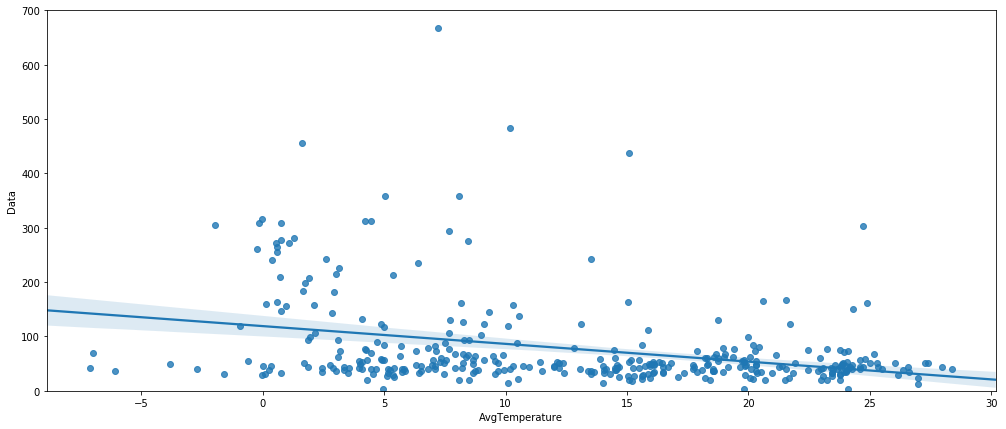

In [25]:
#def tempcorr(t,df):

x=pd.merge(left=gb15_pm10, left_on='DateTime', right=Temp2015, right_on='Date')
x=x[['DateTime','Data','AvgTemperature']]
x.head()
plt.figure(figsize=(17,7))
sns.regplot(x='AvgTemperature',y='Data',data=x)
plt.ylim(0,)

x.corr()

In [14]:
def tempcorr(t,df):

 x=pd.merge(left=df, left_on='DateTime', right=t, right_on='Date')
 x=x[['DateTime','Data','AvgTemperature']]
 x.head()
 plt.figure(figsize=(17,7))
 sns.regplot(x='AvgTemperature',y='Data',data=x)
 plt.ylim(0,)

 print(x.corr())

# AVERAGE TEMPERATURE BY DAY IN SKOPJE

In [15]:
Sk_temp=Temp[['Year','AvgTemperature']]

date1 = '2015-01-01'
date2 = '2015-12-31'
mydates = pd.date_range(date1, date2).tolist()
mydatesf=pd.DataFrame(mydates)

meantemp=Sk_temp['AvgTemperature'].mean()
meantemp
Sk_temp['AvgTemperature'].replace(-99.0,meantemp,inplace=True)
Sk_temp['AvgTemperature']=(Sk_temp['AvgTemperature']-30)/2

Temp2015=Sk_temp[Sk_temp['Year']==2015].reset_index()
Temp2015=Temp2015[['AvgTemperature']]
Temp2015['Date']=mydatesf
Temp2015.dropna(axis=0,inplace=True)

Temp2016=Sk_temp[Sk_temp['Year']==2016].reset_index()
Temp2016=Temp2016[['AvgTemperature']]
Temp2016['Date']=mydatesf

Temp2017=Sk_temp[Sk_temp['Year']==2017].reset_index()
Temp2017=Temp2017[['AvgTemperature']]
Temp2017['Date']=mydatesf

Temp2018=Sk_temp[Sk_temp['Year']==2018].reset_index()
Temp2018=Temp2018[['AvgTemperature']]
Temp2018['Date']=mydatesf

Temp2019=Sk_temp[Sk_temp['Year']==2019].reset_index()
Temp2019=Temp2019[['AvgTemperature']]
Temp2019['Date']=mydatesf


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Station Gazi Baba 


In [32]:
gb2015=df2015[df2015['StationName']=='GaziBaba'].reset_index()
gb2015.drop("index", axis=1, inplace=True) 
len(gb2015)
#gb2015.describe()


53079

In [33]:
gb15_aqi,gb15_pm10,gb15_pm25=opstina(gb2015)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The number of days with pm10 value over the recommended 50 is 166
There are 243 missing values for pm10 particle count, out of 8760
There are 7773 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
gb2016=df2016[df2016['StationName']=='GaziBaba'].reset_index()
gb2016.drop("index", axis=1, inplace=True) 
gb16_aqi,gb16_pm10,gb16_pm25=opstina(gb2016)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 111
There are 904 missing values for pm10 particle count, out of 8760
There are 2820 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
gb2017=df2017[df2017['StationName']=='GaziBaba'].reset_index()
gb2017.drop("index", axis=1, inplace=True) 
gb17_aqi,gb17_pm10,gb17_pm25=opstina(gb2017)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 180
There are 348 missing values for pm10 particle count, out of 8760
There are 8617 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [36]:
gb2018=df2018[df2018['StationName']=='GaziBaba'].reset_index()
gb2018.drop("index", axis=1, inplace=True) 
gb18_aqi,gb18_pm10,gb18_pm25=opstina(gb2018)

The number of days with pm10 value over the recommended 50 is 63
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [37]:
gb2019=df2019[df2019['StationName']=='GaziBaba'].reset_index()
gb2019.drop("index", axis=1, inplace=True) 
gb19_aqi,gb19_pm10,gb19_pm25=opstina(gb2019)

The number of days with pm10 value over the recommended 50 is 36
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

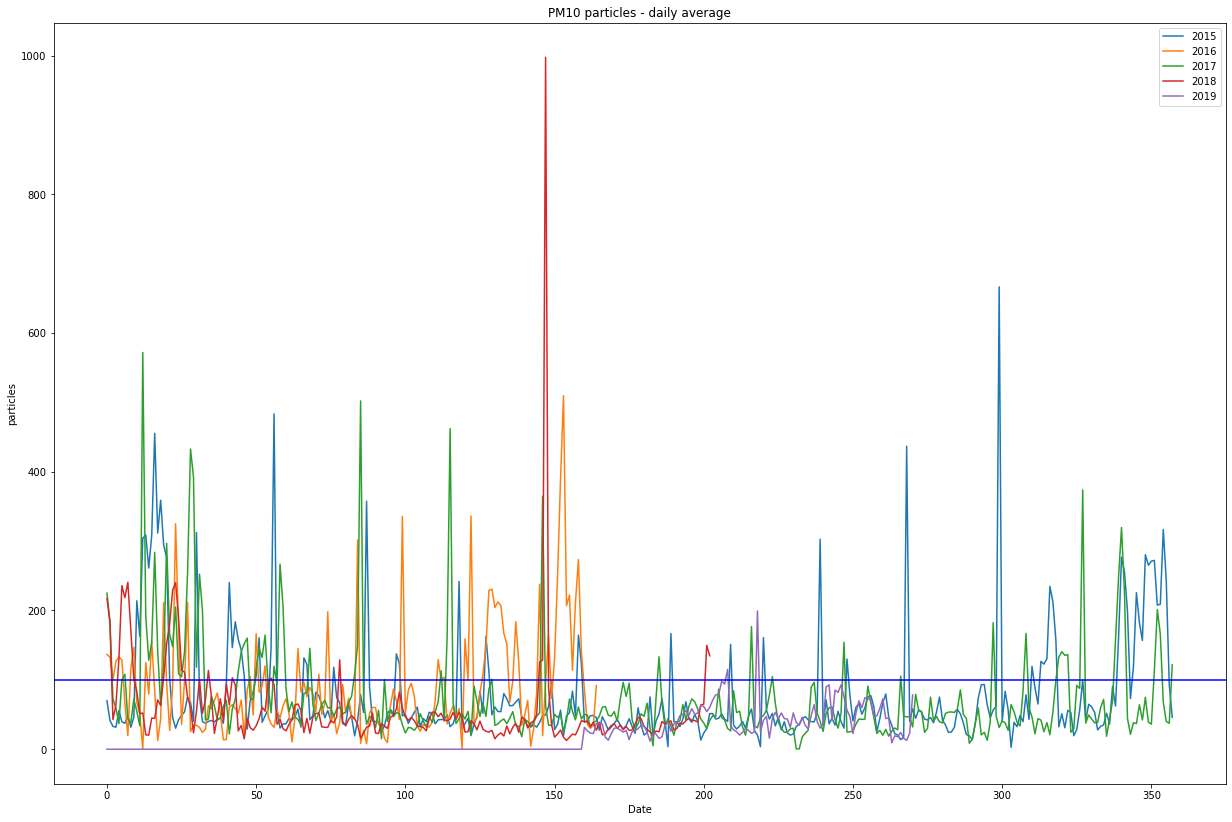

In [50]:
plotting(gb15_pm10,gb16_pm10,gb17_pm10,gb18_pm10,gb19_pm10)

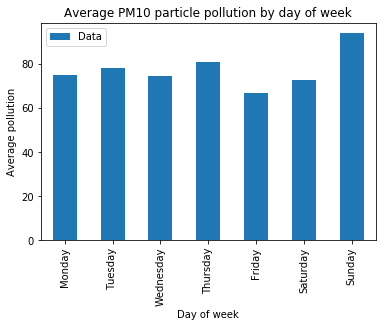

                Data
day                 
Monday     74.967857
Tuesday    78.176254
Wednesday  74.445198
Thursday   80.856499
Friday     66.730112
Saturday   72.661975
Sunday     94.010520


In [16]:
nedelagb2015=denodnedela(gb15_pm10)

                    Data  AvgTemperature
Data            1.000000       -0.330067
AvgTemperature -0.330067        1.000000


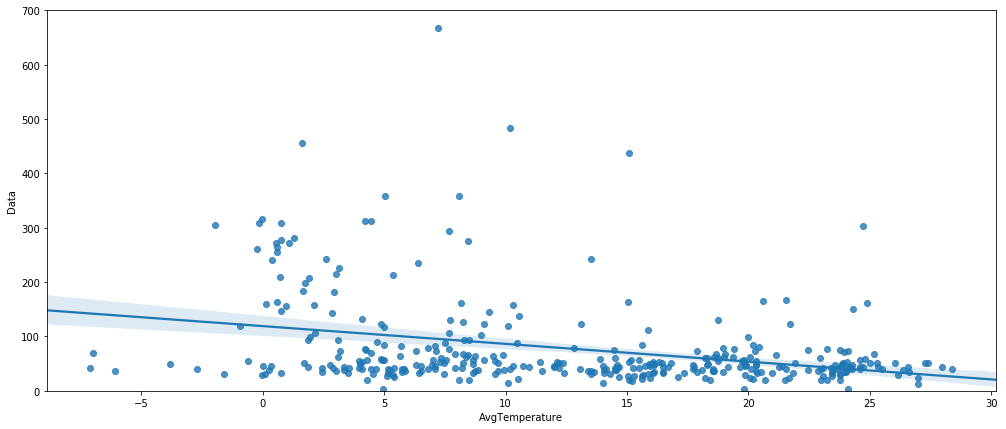

In [24]:
tempcorr(Temp2015,gb15_pm10)


## Station Centar 

In [18]:
cen2015=df2015[df2015['StationName']=='Centar'].reset_index()
cen2015.drop("index", axis=1, inplace=True) 
cen15_aqi,cen15_pm10,cen15_pm25=opstina(cen2015)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 129
There are 785 missing values for pm10 particle count, out of 8760
There are 201 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
cen2016=df2016[df2016['StationName']=='Centar'].reset_index()
cen2016.drop("index", axis=1, inplace=True) 
cen16_aqi,cen16_pm10,cen16_pm25=opstina(cen2016)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 78
There are 249 missing values for pm10 particle count, out of 8760
There are 472 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
cen2017=df2017[df2017['StationName']=='Centar'].reset_index()
cen2017.drop("index", axis=1, inplace=True) 
cen17_aqi,cen17_pm10,cen17_pm25=opstina(cen2017)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 117
There are 521 missing values for pm10 particle count, out of 8760
There are 527 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
cen2018=df2018[df2018['StationName']=='Centar'].reset_index()
cen2018.drop("index", axis=1, inplace=True) 
cen18_aqi,cen18_pm10,cen18_pm25=opstina(cen2018)

The number of days with pm10 value over the recommended 50 is 95
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [23]:
cen2019=df2019[df2019['StationName']=='Centar'].reset_index()
cen2019.drop("index", axis=1, inplace=True) 
cen19_aqi,cen19_pm10,cen19_pm25=opstina(cen2019)

The number of days with pm10 value over the recommended 50 is 100
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

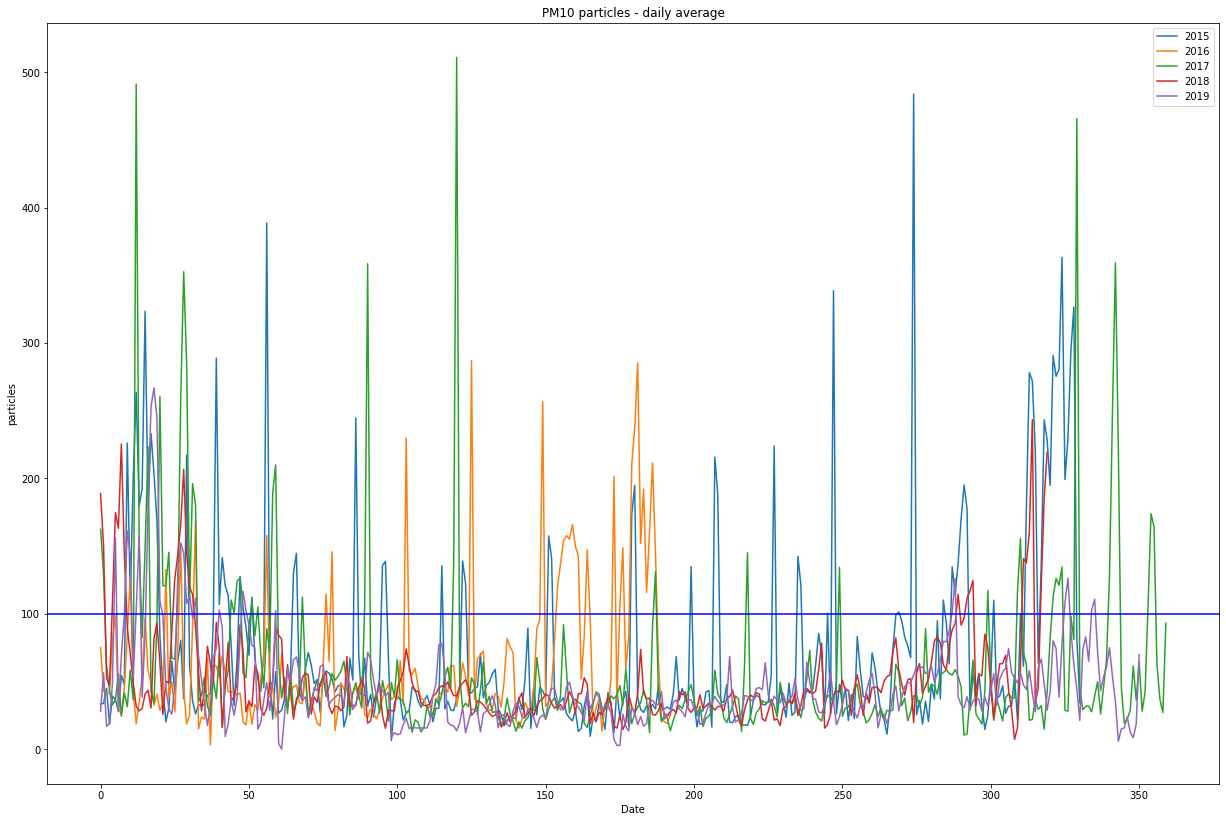

In [24]:
plotting(cen15_pm10,cen16_pm10,cen17_pm10,cen18_pm10,cen19_pm10)

## Station Karpos

In [25]:
kar2015=df2015[df2015['StationName']=='Karpos'].reset_index()
kar2015.drop("index", axis=1, inplace=True) 
kar15_aqi,kar15_pm10,kar15_pm25=opstina(kar2015)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 111
There are 541 missing values for pm10 particle count, out of 8760
There are 826 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
kar2016=df2016[df2016['StationName']=='Karpos'].reset_index()
kar2016.drop("index", axis=1, inplace=True) 
kar16_aqi,kar16_pm10,kar16_pm25=opstina(kar2016)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 79
There are 33 missing values for pm10 particle count, out of 8760
There are 81 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
kar2017=df2017[df2017['StationName']=='Karpos'].reset_index()
kar2017.drop("index", axis=1, inplace=True) 
kar17_aqi,kar17_pm10,kar17_pm25=opstina(kar2017)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 134
There are 247 missing values for pm10 particle count, out of 8760
There are 301 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
kar2018=df2018[df2018['StationName']=='Karpos'].reset_index()
kar2018.drop("index", axis=1, inplace=True) 
kar18_aqi,kar18_pm10,kar18_pm25=opstina(kar2018)

The number of days with pm10 value over the recommended 50 is 107
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [29]:
kar2019=df2019[df2019['StationName']=='Karpos'].reset_index()
kar2019.drop("index", axis=1, inplace=True) 
kar19_aqi,kar19_pm10,kar19_pm25=opstina(kar2019)

The number of days with pm10 value over the recommended 50 is 97
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

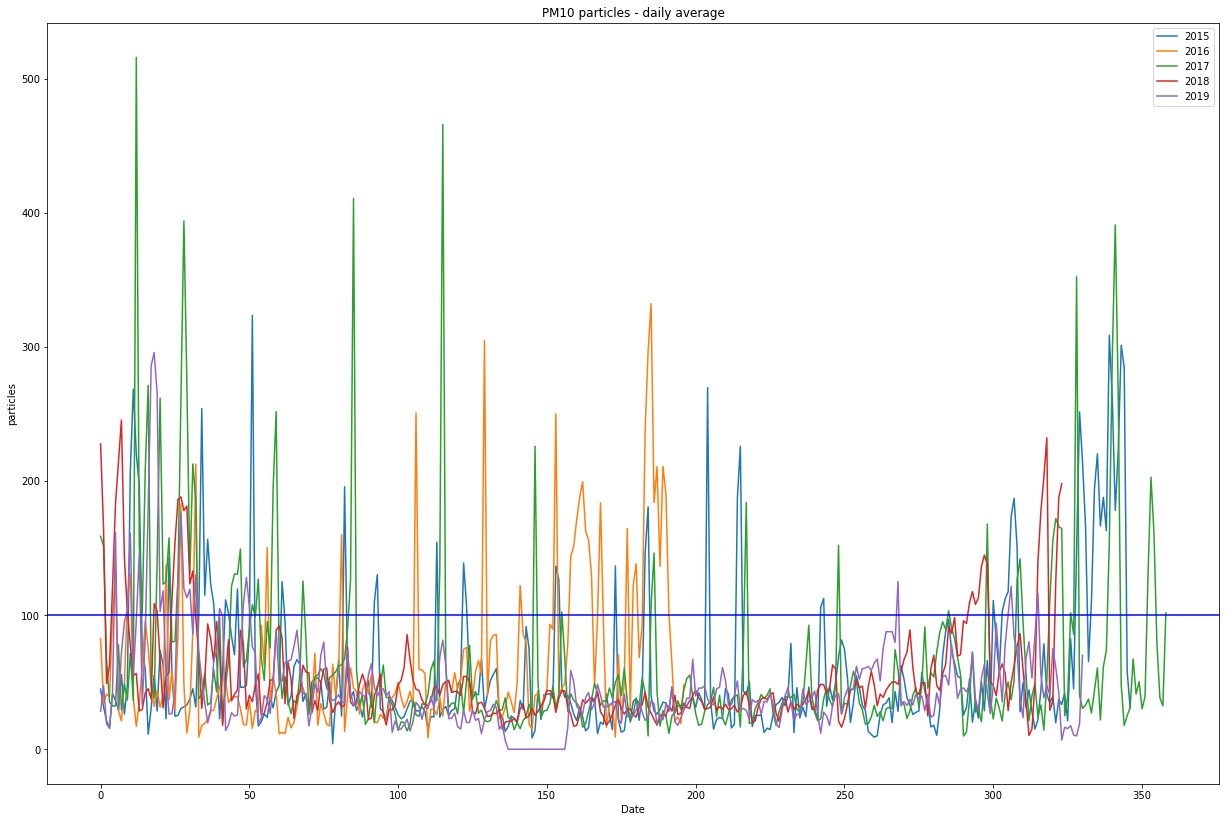

In [31]:
plotting(kar15_pm10,kar16_pm10,kar17_pm10,kar18_pm10,kar19_pm10)

## Station Lisice

In [36]:
lis2015=df2015[df2015['StationName']=='Lisice'].reset_index()
lis2015.drop("index", axis=1, inplace=True) 
lis15_aqi,lis15_pm10,lis15_pm25=opstina(lis2015)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The number of days with pm10 value over the recommended 50 is 156
There are 41 missing values for pm10 particle count, out of 8760
There are 7773 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
lis2016=df2016[df2016['StationName']=='Lisice'].reset_index()
lis2016.drop("index", axis=1, inplace=True) 
lis16_aqi,lis16_pm10,lis16_pm25=opstina(lis2016)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 92
There are 210 missing values for pm10 particle count, out of 8760
There are 2868 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
lis2017=df2017[df2017['StationName']=='Lisice'].reset_index()
lis2017.drop("index", axis=1, inplace=True) 
lis17_aqi,lis17_pm10,lis17_pm25=opstina(lis2017)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 153
There are 237 missing values for pm10 particle count, out of 8760
There are 8615 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
lis2018=df2018[df2018['StationName']=='Lisice'].reset_index()
lis2018.drop("index", axis=1, inplace=True) 
lis18_aqi,lis18_pm10,lis18_pm25=opstina(lis2018)

The number of days with pm10 value over the recommended 50 is 77
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [32]:
lis2019=df2019[df2019['StationName']=='Lisice'].reset_index()
lis2019.drop("index", axis=1, inplace=True) 
lis19_aqi,lis19_pm10,lis19_pm25=opstina(lis2019)

The number of days with pm10 value over the recommended 50 is 8
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

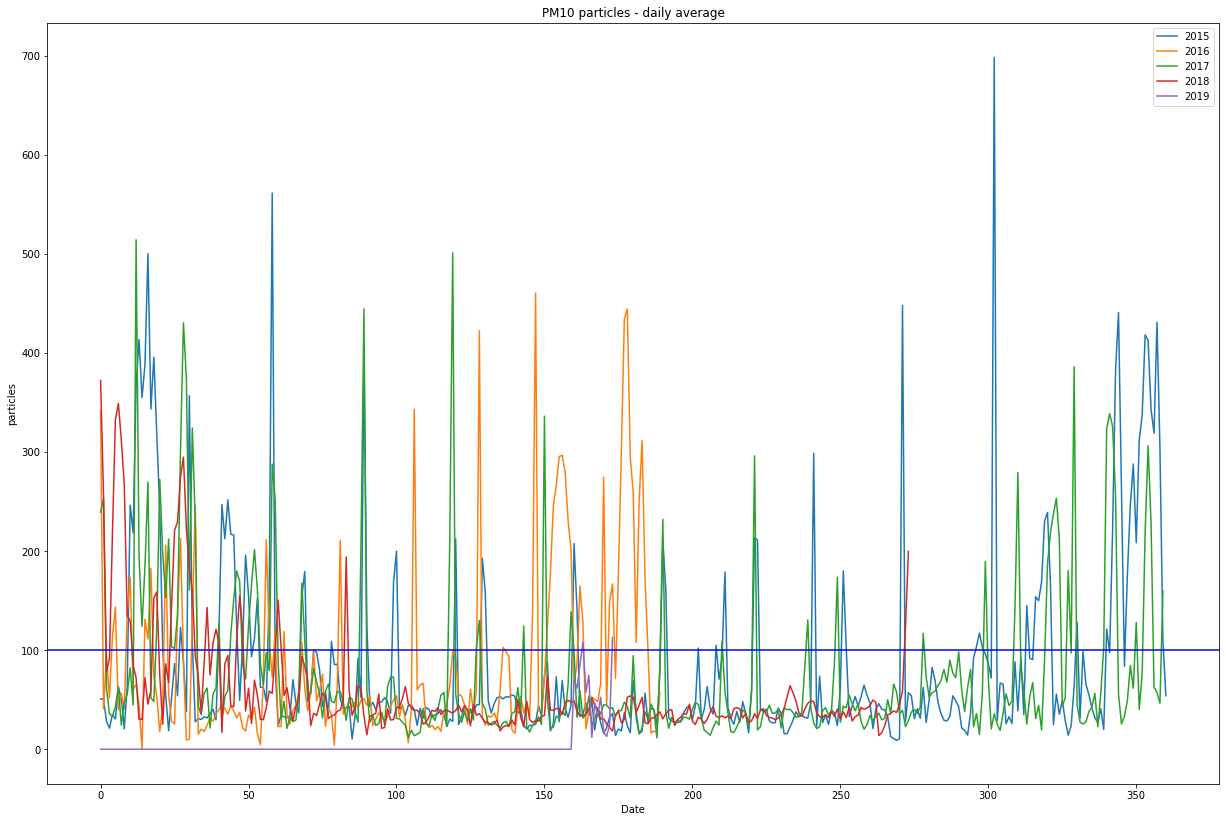

In [37]:
plotting(lis15_pm10,lis16_pm10,lis17_pm10,lis18_pm10,lis19_pm10)

## Station Rektorat

In [42]:
rek2015=df2015[df2015['StationName']=='Rektorat'].reset_index()
rek2015.drop("index", axis=1, inplace=True) 
rek15_aqi,rek15_pm10,rek15_pm25=opstina(rek2015)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The number of days with pm10 value over the recommended 50 is 97
There are 190 missing values for pm10 particle count, out of 8760
There are 7773 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
rek2016=df2016[df2016['StationName']=='Rektorat'].reset_index()
rek2016.drop("index", axis=1, inplace=True) 
rek16_aqi,rek16_pm10,rek16_pm25=opstina(rek2016)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 92
There are 145 missing values for pm10 particle count, out of 8760
There are 2594 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
rek2017=df2017[df2017['StationName']=='Rektorat'].reset_index()
rek2017.drop("index", axis=1, inplace=True) 
rek17_aqi,rek17_pm10,rek17_pm25=opstina(rek2017)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

The number of days with pm10 value over the recommended 50 is 182
There are 561 missing values for pm10 particle count, out of 8760
There are 8606 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
rek2018=df2018[df2018['StationName']=='Rektorat'].reset_index()
rek2018.drop("index", axis=1, inplace=True) 
rek18_aqi,rek18_pm10,rek18_pm25=opstina(rek2018)

The number of days with pm10 value over the recommended 50 is 204
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [38]:
rek2019=df2019[df2019['StationName']=='Rektorat'].reset_index()
rek2019.drop("index", axis=1, inplace=True) 
rek19_aqi,rek19_pm10,rek19_pm25=opstina(rek2019)

The number of days with pm10 value over the recommended 50 is 149
There are 0 missing values for pm10 particle count, out of 8760
There are 0 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

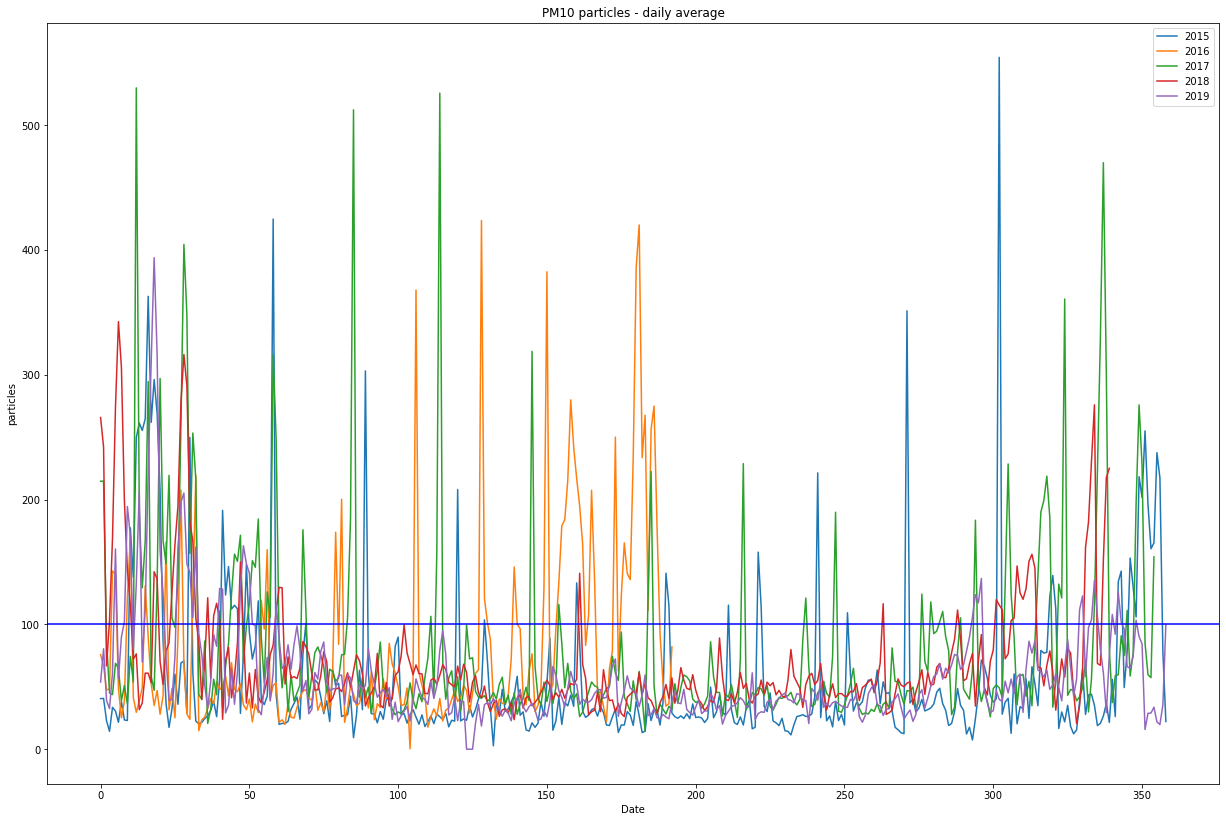

In [45]:
plotting(rek15_pm10,rek16_pm10,rek17_pm10,rek18_pm10,rek19_pm10)

###  when i removed results over 1000 for pm10, the number of bad air days went from 156 to 129!!!!

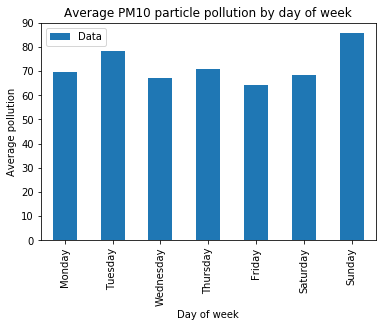

                Data
day                 
Monday     69.575288
Tuesday    78.433139
Wednesday  67.218373
Thursday   70.723995
Friday     64.066481
Saturday   68.424215
Sunday     85.672902


In [27]:
nedelacen2015=denodnedela(cen15_pm10)

                    Data  AvgTemperature
Data            1.000000       -0.345384
AvgTemperature -0.345384        1.000000


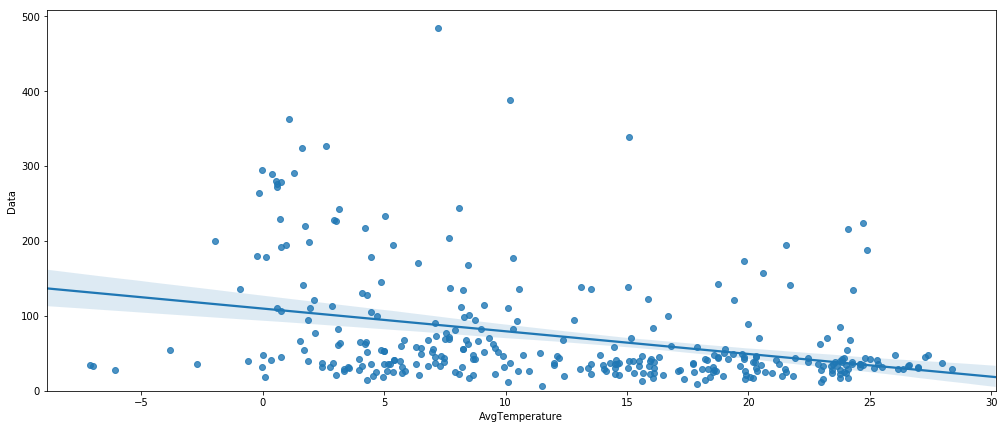

In [28]:
tempcorr(Temp2015,cen15_pm10)

## Station Karpos 2015

In [47]:
kar2015=skopje2015[skopje2015['StationName']=='Karpos'].reset_index()
kar2015.drop("index", axis=1, inplace=True) 
kar2015.head()

,StationName,DateTime,Data,Type
0,Karpos,2015-01-01 00:00:00,0.15,CO
1,Karpos,2015-01-01 00:00:00,9.21,NO2
2,Karpos,2015-01-01 00:00:00,57.36,O3
3,Karpos,2015-01-01 00:00:00,27.59,PM25
4,Karpos,2015-01-01 00:00:00,28.24,PM10


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

The number of days with pm10 value over the recommended 50 is 111
There are 541 missing values for pm10 particle count, out of 8760
There are 826 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


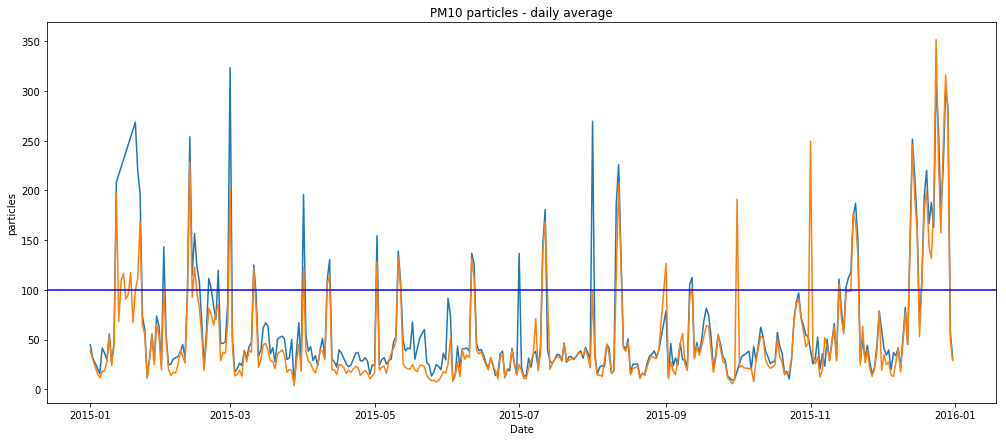

In [60]:
kar15_aqi,kar15_pm10,kar_pm25=opstina(kar2015)

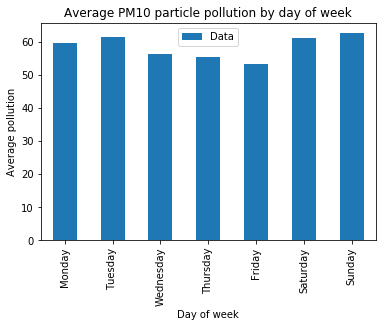

                Data
day                 
Monday     59.695429
Tuesday    61.311585
Wednesday  56.206033
Thursday   55.460753
Friday     53.276102
Saturday   60.981266
Sunday     62.545739


In [49]:
nedelakar2015=denodnedela(kar15_pm10)

                    Data  AvgTemperature
Data            1.000000       -0.345384
AvgTemperature -0.345384        1.000000


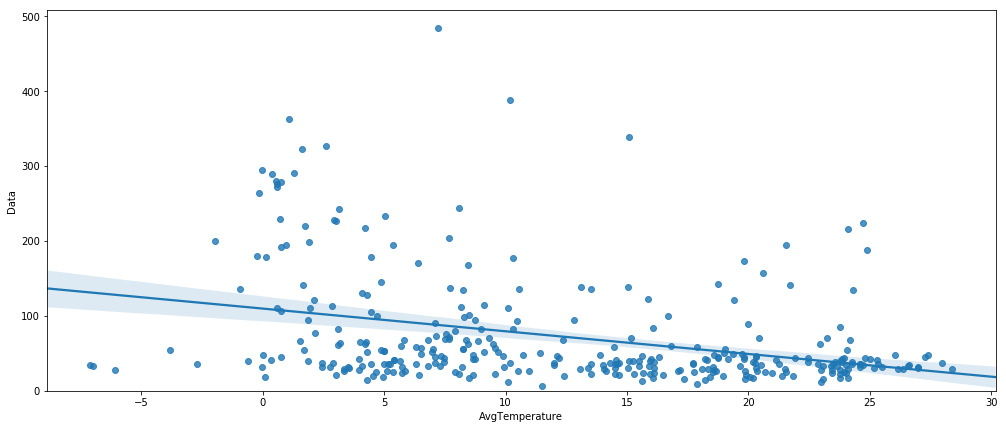

In [50]:
tempcorr(Temp2015,cen15_pm10)

## Station Lisice 2015

In [51]:
lis2015=skopje2015[skopje2015['StationName']=='Lisice'].reset_index()
lis2015.drop("index", axis=1, inplace=True) 
lis2015.head()

,StationName,DateTime,Data,Type
0,Lisice,2015-01-01 00:00:00,1.93,CO
1,Lisice,2015-01-01 00:00:00,0.86,NO2
2,Lisice,2015-01-01 00:00:00,55.38,O3
3,Lisice,2015-01-01 00:00:00,NaN,PM25
4,Lisice,2015-01-01 00:00:00,27.95,PM10


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The number of days with pm10 value over the recommended 50 is 156
There are 41 missing values for pm10 particle count, out of 8760
There are 7773 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


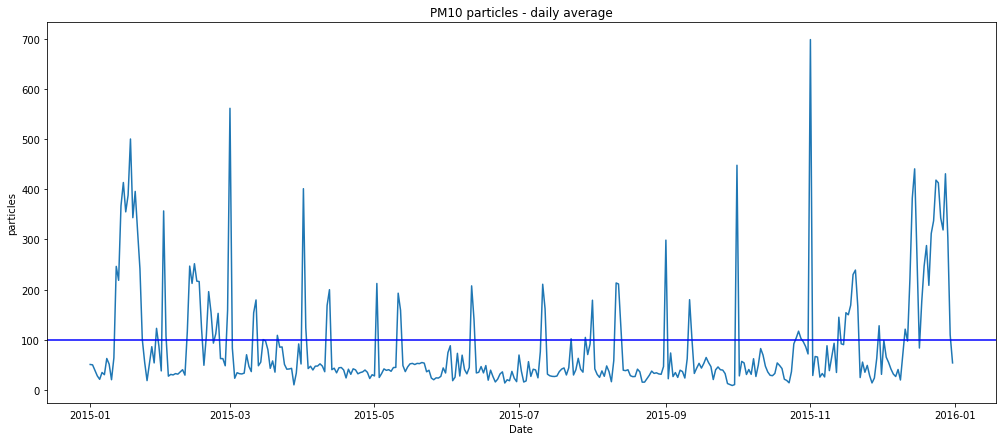

In [61]:
lis15_aqi,lis15_pm10,lis15_pm25=opstina(lis2015)

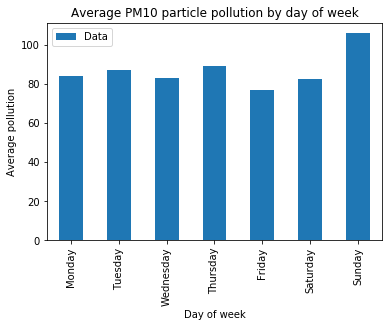

                 Data
day                  
Monday      84.105759
Tuesday     87.106675
Wednesday   82.899429
Thursday    89.127448
Friday      77.037269
Saturday    82.542132
Sunday     106.004206


In [53]:
nedelalis2015=denodnedela(lis15_pm10)

                    Data  AvgTemperature
Data            1.000000       -0.373616
AvgTemperature -0.373616        1.000000


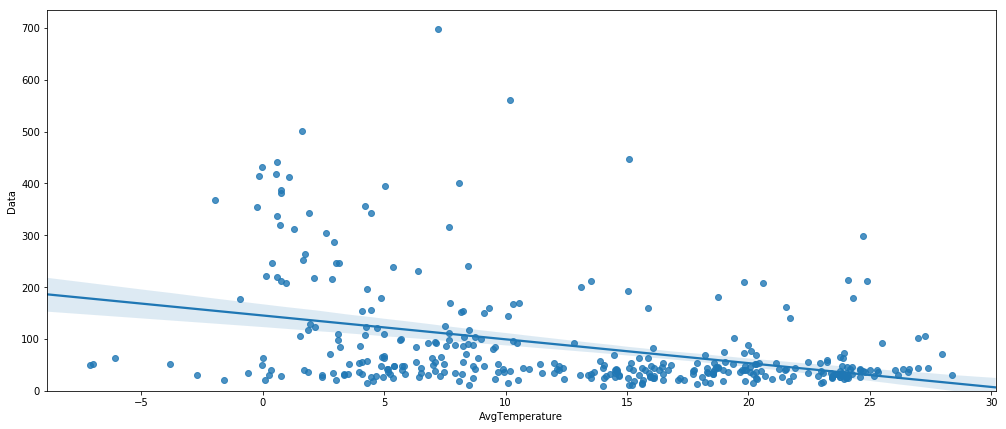

In [54]:
tempcorr(Temp2015,lis15_pm10)

## Station Rektorat 2015

In [55]:
rek2015=skopje2015[skopje2015['StationName']=='Rektorat'].reset_index()
rek2015.drop("index", axis=1, inplace=True) 
rek2015.head()

,StationName,DateTime,Data,Type
0,Rektorat,2015-01-01 00:00:00,0.68,CO
1,Rektorat,2015-01-01 00:00:00,15.38,NO2
2,Rektorat,2015-01-01 00:00:00,40.84,O3
3,Rektorat,2015-01-01 00:00:00,NaN,PM25
4,Rektorat,2015-01-01 00:00:00,26.69,PM10


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The number of days with pm10 value over the recommended 50 is 97
There are 190 missing values for pm10 particle count, out of 8760
There are 7773 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


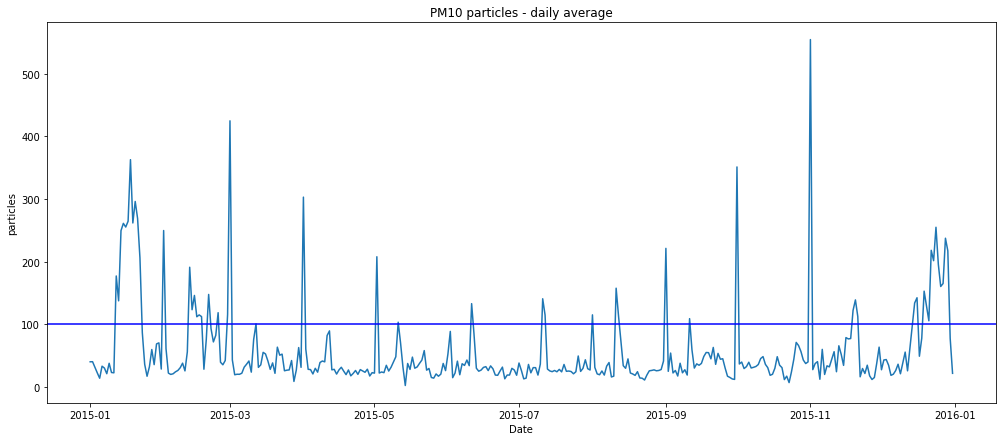

In [62]:
rek15_aqi,rek15_pm10,rek15_pm25=opstina(rek2015)

In [63]:
rek15_pm10.describe()

,Data
count,359.000000
mean,57.223589
std,67.433409
min,2.730000
25%,24.613182
50%,32.464091
75%,54.754160
max,554.246667


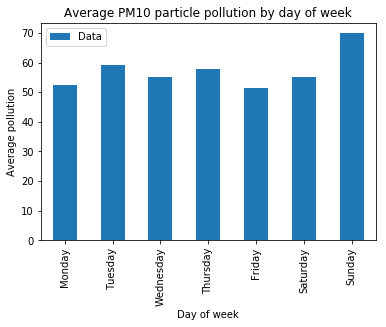

                Data
day                 
Monday     52.254401
Tuesday    59.055202
Wednesday  55.051540
Thursday   57.921468
Friday     51.269493
Saturday   55.278961
Sunday     69.893394


In [64]:
nedelarek2015=denodnedela(rek15_pm10)

                    Data  AvgTemperature
Data            1.000000       -0.308164
AvgTemperature -0.308164        1.000000


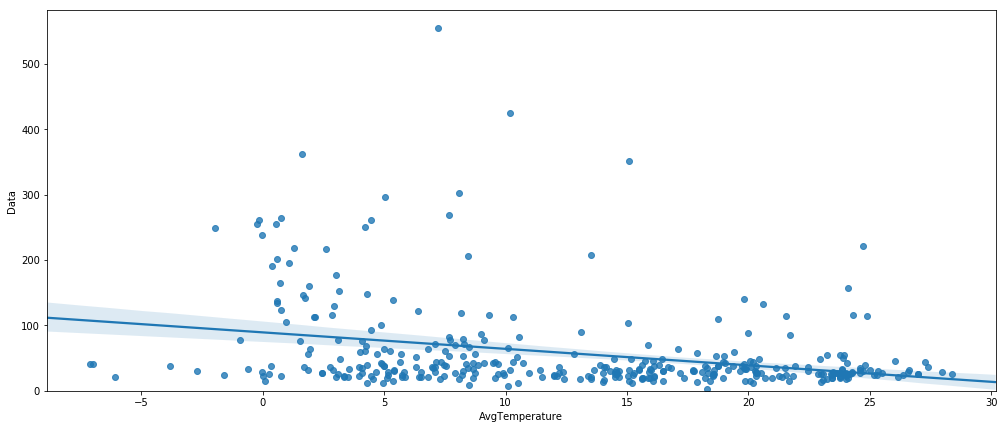

In [65]:
tempcorr(Temp2015,rek15_pm10)


#  2016

# DATA ENTRY

In [35]:
body = client_5cd7f4b5da084e44a01840c358001f06.get_object(Bucket='aircare-donotdelete-pr-6veis12auc564p',Key='izbrani 2016.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2= pd.read_excel(body)
df2.head()


,StationName,DateTime,Data,Type,Temperature,Humidity,WindSpeed,Percipitation
0,Centar,2016-01-01 00:00:00,75.11,PM10,-9.57,0.53,1.0,NaN
1,GaziBaba,2016-01-01 00:00:00,136.52,PM10,-9.57,0.53,1.0,NaN
2,Karpos,2016-01-01 00:00:00,82.48,PM10,-9.57,0.53,1.0,NaN
3,Lisice,2016-01-01 00:00:00,341.78,PM10,-9.57,0.53,1.0,NaN
4,Rektorat,2016-01-01 00:00:00,75.77,PM10,-9.57,0.53,1.0,NaN


In [36]:
date1 = '2016-01-01'
date2 = '2016-12-31'
mydates = pd.date_range(date1, date2).tolist()
mydatesf=pd.DataFrame(mydates)

meantemp=Sk_temp['AvgTemperature'].mean()
meantemp
Sk_temp['AvgTemperature'].replace(-99.0,meantemp,inplace=True)
Sk_temp['AvgTemperature']=(Sk_temp['AvgTemperature']-30)/2

Temp2016=Sk_temp[Sk_temp['Year']==2016].reset_index()
Temp2016=Temp2016[['AvgTemperature']]
Temp2016['Date']=mydatesf


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
column_names=['StationName','DateTime','Data','Type']
skopje2016=df2[['StationName','DateTime','Data','Type']]
skopje2016=skopje2016.drop([0], axis=0).reset_index()
skopje2016.drop("index", axis=1, inplace=True) 
skopje2016.columns=column_names
skopje2016.head()



,StationName,DateTime,Data,Type
0,GaziBaba,2016-01-01 00:00:00,136.52,PM10
1,Karpos,2016-01-01 00:00:00,82.48,PM10
2,Lisice,2016-01-01 00:00:00,341.78,PM10
3,Rektorat,2016-01-01 00:00:00,75.77,PM10
4,Centar,2016-10-12 13:00:00,1.053.833,AQI


## Station Gazi Baba 2016

In [53]:
gb16=skopje2016[skopje2016['StationName']=='GaziBaba'].reset_index()
gb16.drop("index", axis=1, inplace=True) 
gb16.head()

,StationName,DateTime,Data,Type
0,GaziBaba,2016-01-01 00:00:00,136.52,PM10
1,GaziBaba,2016-10-12 13:00:00,110.75,AQI
2,GaziBaba,2016-10-12 14:00:00,173.98,PM10
3,GaziBaba,2016-10-12 14:00:00,38.17,PM25
4,GaziBaba,2016-10-12 14:00:00,1.36,CO


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

The number of days with pm10 value over the recommended 50 is 111
There are 904 missing values for pm10 particle count, out of 8760
There are 2820 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


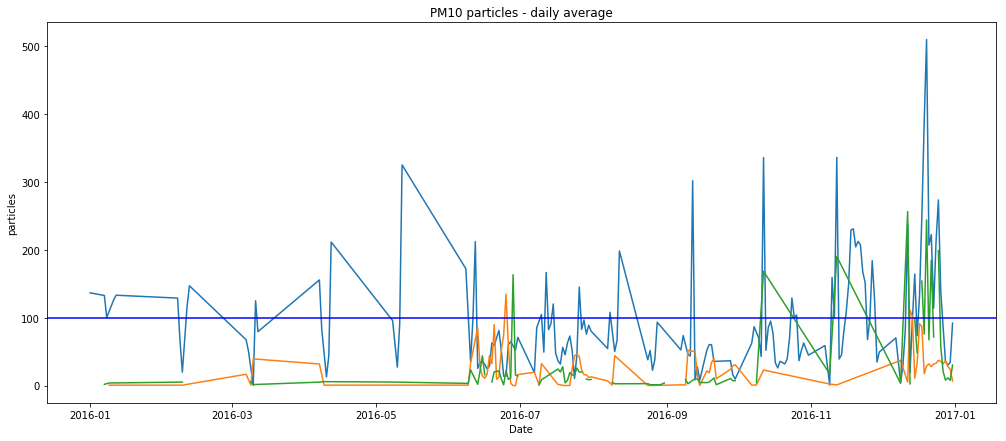

In [54]:
gb16_aqi,gb16_pm10,gb16_pm25=opstina(gb16)

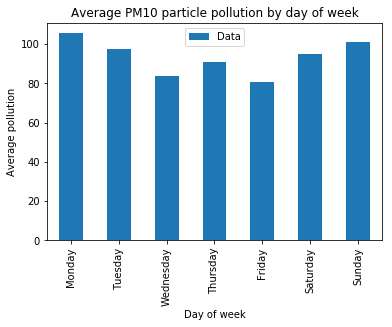

                 Data
day                  
Monday     105.562672
Tuesday     97.596257
Wednesday   83.604986
Thursday    91.018958
Friday      80.865862
Saturday    95.202317
Sunday     101.118131


In [55]:
nedelagb2016=denodnedela(gb16_pm10)

                   Data  AvgTemperature
Data            1.00000        -0.36357
AvgTemperature -0.36357         1.00000


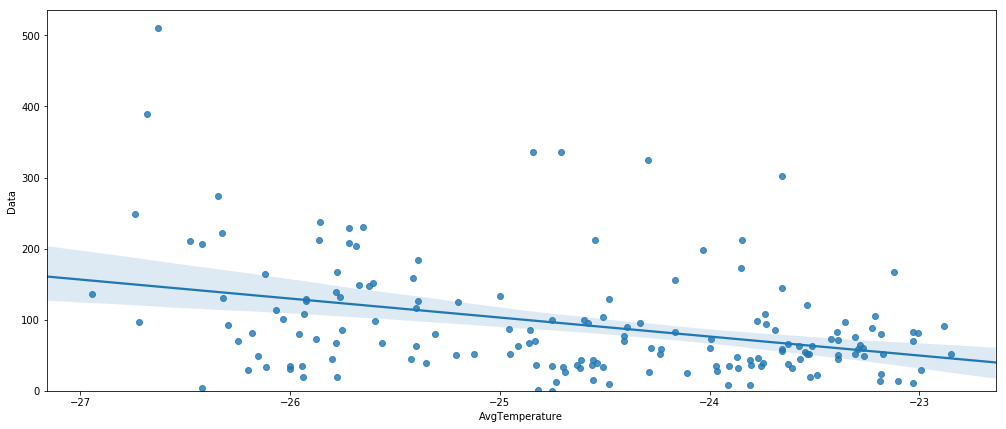

In [56]:
tempcorr(Temp2016,gb16_pm10)

## Station Karposh 2016

In [58]:
ka16=skopje2016[skopje2016['StationName']=='Karpos'].reset_index()
ka16.drop("index", axis=1, inplace=True) 
ka16.head()

,StationName,DateTime,Data,Type
0,Karpos,2016-01-01 00:00:00,82.48,PM10
1,Karpos,2016-10-12 13:00:00,1.428.181,AQI
2,Karpos,2016-10-12 14:00:00,146.76,PM10
3,Karpos,2016-10-12 14:00:00,124.96,PM25
4,Karpos,2016-10-12 14:00:00,1.09,CO


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

The number of days with pm10 value over the recommended 50 is 79
There are 33 missing values for pm10 particle count, out of 8760
There are 81 missing values for pm25 particle count, out of 8760
There are 0 missing values for aqi, out of 8760


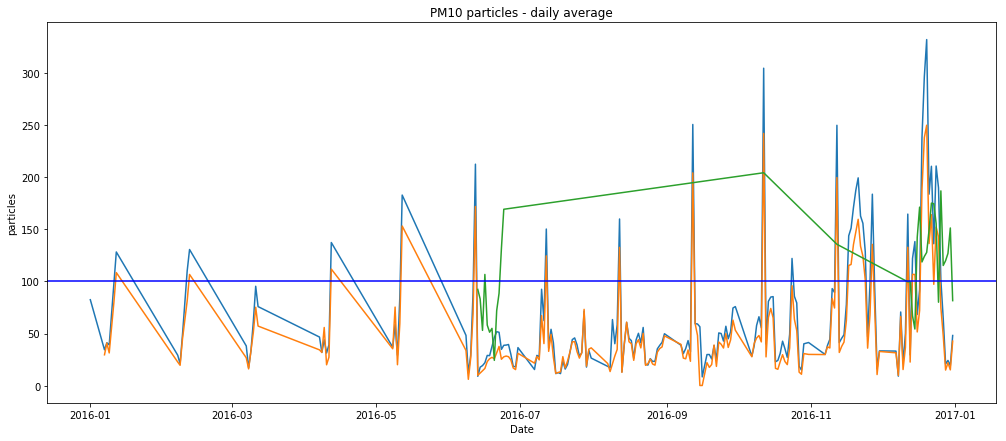

In [61]:
ka16_aqi,ka16_pm10,ka16_pm25=opstina(ka16)

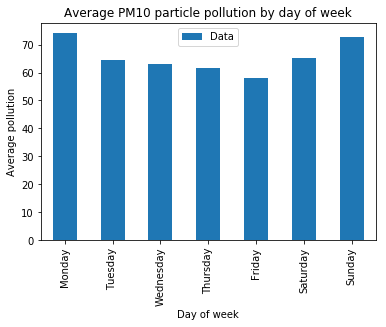

                Data
day                 
Monday     74.049616
Tuesday    64.636870
Wednesday  63.079471
Thursday   61.612632
Friday     57.915228
Saturday   65.209725
Sunday     72.573630


In [62]:
nedelaka2016=denodnedela(ka16_pm10)

                    Data  AvgTemperature
Data            1.000000       -0.414782
AvgTemperature -0.414782        1.000000


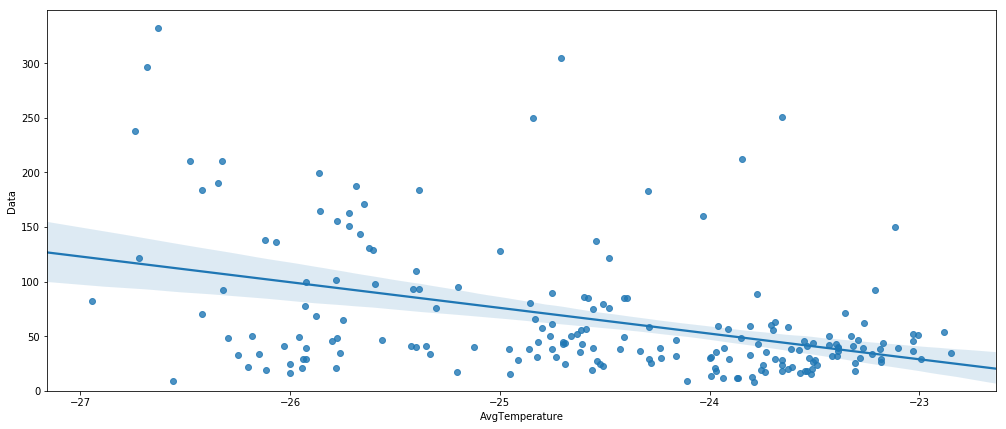

In [63]:
tempcorr(Temp2016,ka16_pm10)

# Checking the line plot data inconsistency with a scatter plot. I have chosen measuring station Rektorat 2016.

In [30]:
scatterRektorat=pd.DataFrame(Rektorat2016)
scatterRektorat.head()

,0,1,2,3,4,5,6,7
0,Rektorat,1/1/2016 0:00,75.770000,PM10,-9.57,0.53,1,None
1,Rektorat,10/12/2016 13:00,None,AQI,NULL,NULL,NULL,NULL
2,Rektorat,10/12/2016 14:00,221.480000,PM10,7.36,0.45,1.66,None
3,Rektorat,10/12/2016 14:00,20.800000,PM25,7.36,0.45,1.66,None
4,Rektorat,10/12/2016 14:00,2.980000,CO,7.36,0.45,1.66,None


In [31]:
cesticki=['PM10']
scatterRektorat=scatterRektorat[scatterRektorat[3].isin(cesticki)].reset_index(drop=True)

In [32]:
columnnames=['StationName','DateTime','Data','Type','Temperature','Humidity','WindSpeed','Percipitation']
scatterRektorat.columns=columnnames


In [33]:
scatterRektorat.dropna(subset=['Data'],axis=0,inplace=True)

In [34]:
scatterRektorat=scatterRektorat[['DateTime','Data']]
scatterRektorat["Data"] = pd.to_numeric(scatterRektorat["Data"],errors='coerce')
scatterRektorat['DateTime'] = pd.to_datetime(scatterRektorat['DateTime'])
scatterRektorat.head()

,DateTime,Data
0,2016-01-01 00:00:00,75.77
1,2016-10-12 14:00:00,221.48
2,2016-10-12 15:00:00,211.88
3,2016-10-12 16:00:00,308.28
4,2016-10-12 17:00:00,464.00


In [66]:
plt.figure(figsize=(40,15))
plt.plot(scatterRektorat['DateTime'],scatterRektorat["Data"], s =50, c = 'red')
plt.title('PM10 particles in Rektorat 2016')
plt.xlabel('Date')
plt.ylabel('PM10 particles')
plt.axhline(y=100, color='b', linestyle='-')

NameError: name 'scatterRektorat' is not defined

<Figure size 2880x1080 with 0 Axes>

In [8]:
df[0:5]

[('GaziBaba', '1/1/2015 0:00', Decimal('1.94'), 'CO', None, None, None, None),
 ('GaziBaba', '1/1/2015 0:00', Decimal('0.55'), 'NO2', None, None, None, None),
 ('GaziBaba', '1/1/2015 0:00', None, 'O3', None, None, None, None),
 ('GaziBaba', '1/1/2015 0:00', None, 'PM25', None, None, None, None),
 ('GaziBaba', '1/1/2015 0:00', Decimal('60.91'), 'PM10', None, None, None, None)]

In [9]:
df=pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7
0,GaziBaba,1/1/2015 0:00,1.94,CO,None,None,None,None
1,GaziBaba,1/1/2015 0:00,0.55,NO2,None,None,None,None
2,GaziBaba,1/1/2015 0:00,None,O3,None,None,None,None
3,GaziBaba,1/1/2015 0:00,None,PM25,None,None,None,None
4,GaziBaba,1/1/2015 0:00,60.91,PM10,None,None,None,None


In [11]:
df1.shape

(15541, 8)

In [12]:
columnnames=['StationName','DateTime','Data','Type','Temperature','Humidity','WindSpeed','Percipitation']
df1.columns=columnnames

In [13]:
df1.head(20)

,StationName,DateTime,Data,Type,Temperature,Humidity,WindSpeed,Percipitation
0,GaziBaba,1/1/2015 0:00,None,PM25,None,None,None,None
1,GaziBaba,1/1/2015 0:00,60.91,PM10,None,None,None,None
2,GaziBaba,1/1/2015 1:00,None,PM25,None,None,None,None
3,GaziBaba,1/1/2015 1:00,73.87,PM10,None,None,None,None
4,GaziBaba,1/1/2015 2:00,None,PM25,None,None,None,None
5,GaziBaba,1/1/2015 2:00,66.72,PM10,None,None,None,None
6,GaziBaba,1/1/2015 3:00,None,PM25,None,None,None,None
7,GaziBaba,1/1/2015 3:00,49.14,PM10,None,None,None,None
8,GaziBaba,1/1/2015 4:00,None,PM25,None,None,None,None
9,GaziBaba,1/1/2015 4:00,33.91,PM10,None,None,None,None


In [14]:
df1.dropna(subset=['Data'],axis=0,inplace=True)

In [15]:
df1.groupby('Type').count()

,StationName,DateTime,Data,Temperature,Humidity,WindSpeed,Percipitation
Type,,,,,,,
PM10,7525,7525,7525,6972,6972,6972,1723


In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
df1.dtypes

StationName      object
DateTime         object
Data             object
Type             object
Temperature      object
Humidity         object
WindSpeed        object
Percipitation    object
dtype: object

In [39]:
dfpm10=df1[['DateTime','Data']]
dfpm10["Data"] = pd.to_numeric(dfpm10["Data"],errors='coerce')
dfpm10['DateTime'] = pd.to_datetime(dfpm10['DateTime'])
dfpm10.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,DateTime,Data
1,2015-01-01 00:00:00,60.91
3,2015-01-01 01:00:00,73.87
5,2015-01-01 02:00:00,66.72
7,2015-01-01 03:00:00,49.14
9,2015-01-01 04:00:00,33.91


In [40]:
dfpm10.dtypes

DateTime    datetime64[ns]
Data               float64
dtype: object

In [37]:
dfpm10.plot(kind='line',stacked=False,figsize=(20,20))
plt.title('PM10 particles in Gazibaba 2015')
plt.xlabel('Date')
plt.ylabel('PM10 particles')
plt.figure(figsize=(20,20))

ValueError: view limit minimum -36798.13283333333 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f68371530d0> (for post_execute):


ValueError: view limit minimum -36798.13283333333 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36798.13283333333 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

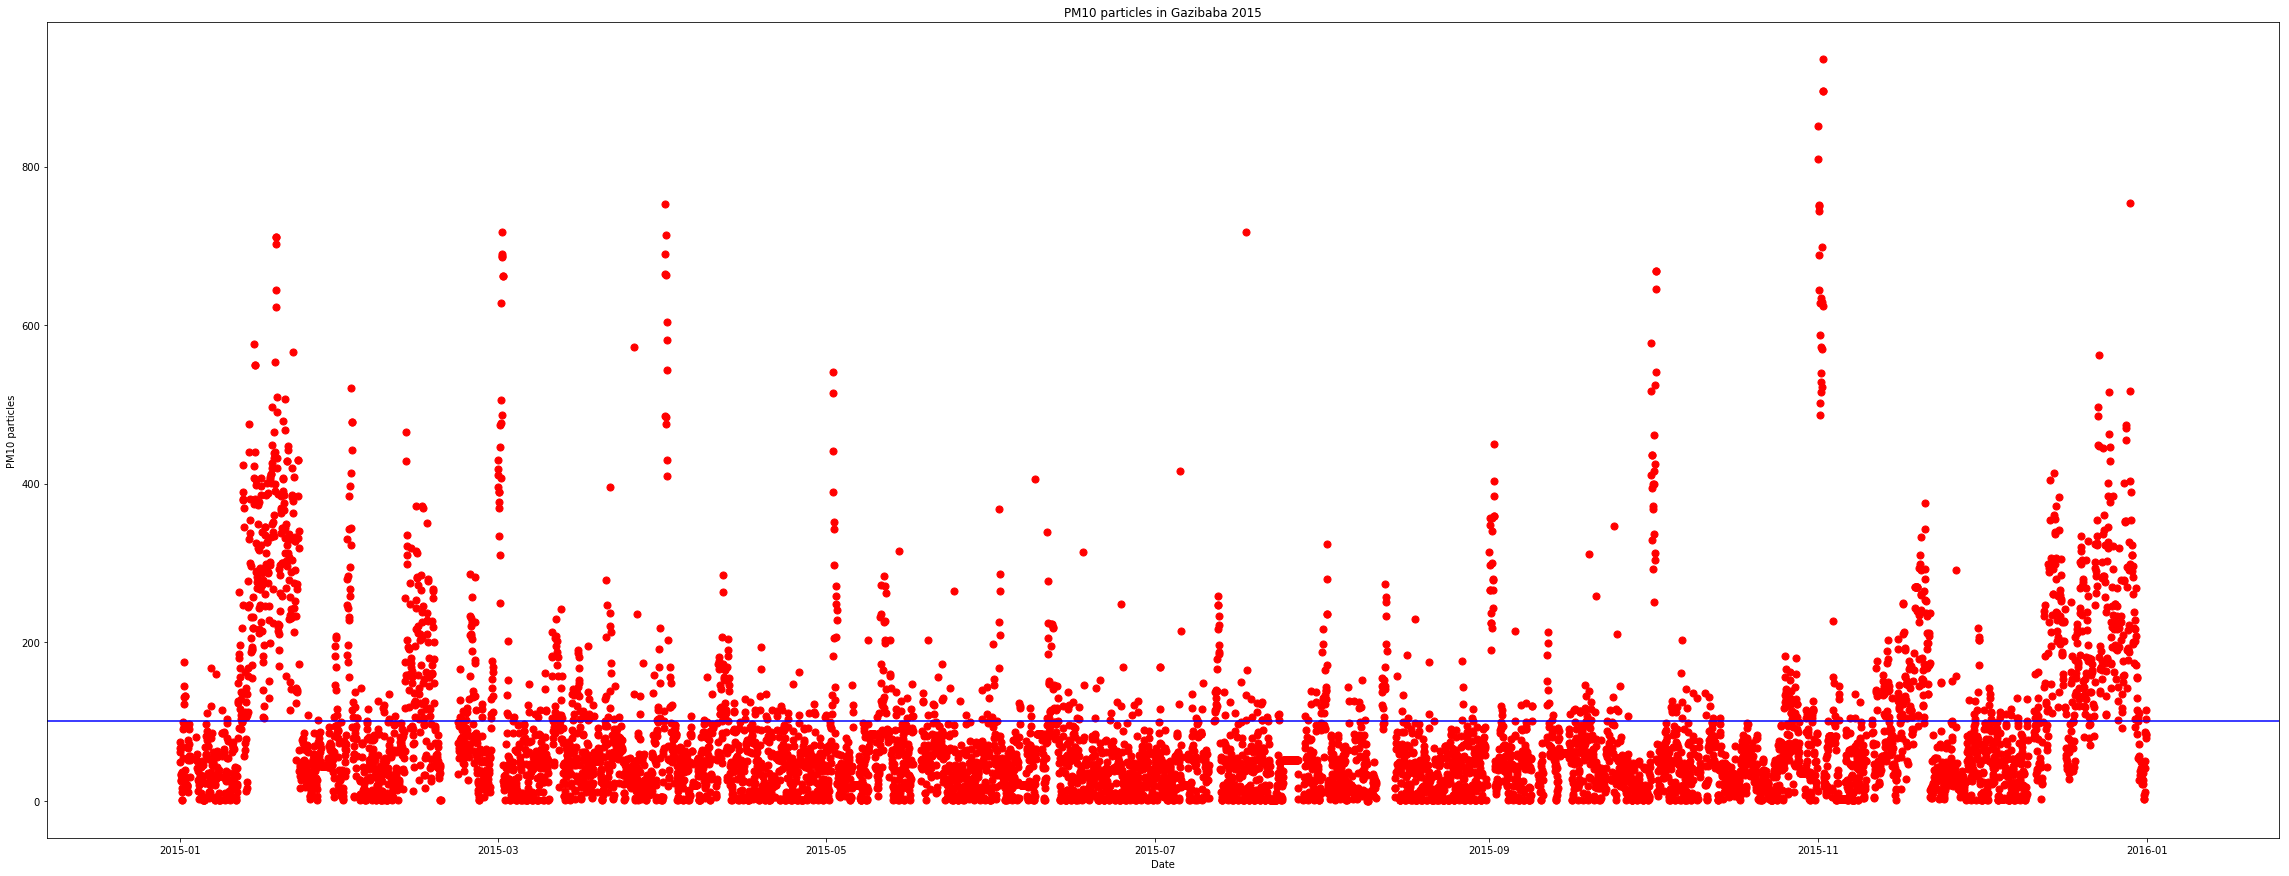

In [49]:
#SCATTER PLOT

DateTime=dfpm10['DateTime']
Data=dfpm10['Data']

plt.figure(figsize=(40,15))
plt.scatter(DateTime, Data, s =50, c = 'red')
plt.title('PM10 particles in Gazibaba 2015')
plt.xlabel('Date')
plt.ylabel('PM10 particles')
plt.axhline(y=100, color='b', linestyle='-')


In [50]:
# dfpm10g is the dataframe which will contain results of pm10 grouped by days
dfpm10g=dfpm10

In [66]:
#finding daily average of pm10 particles for 2015

x=dfpm10g.groupby(dfpm10g['DateTime'].dt.date).mean().reset_index()
x.head()
x['DateTime'] = pd.to_datetime(x['DateTime'])
x.dtypes

DateTime    datetime64[ns]
Data               float64
dtype: object

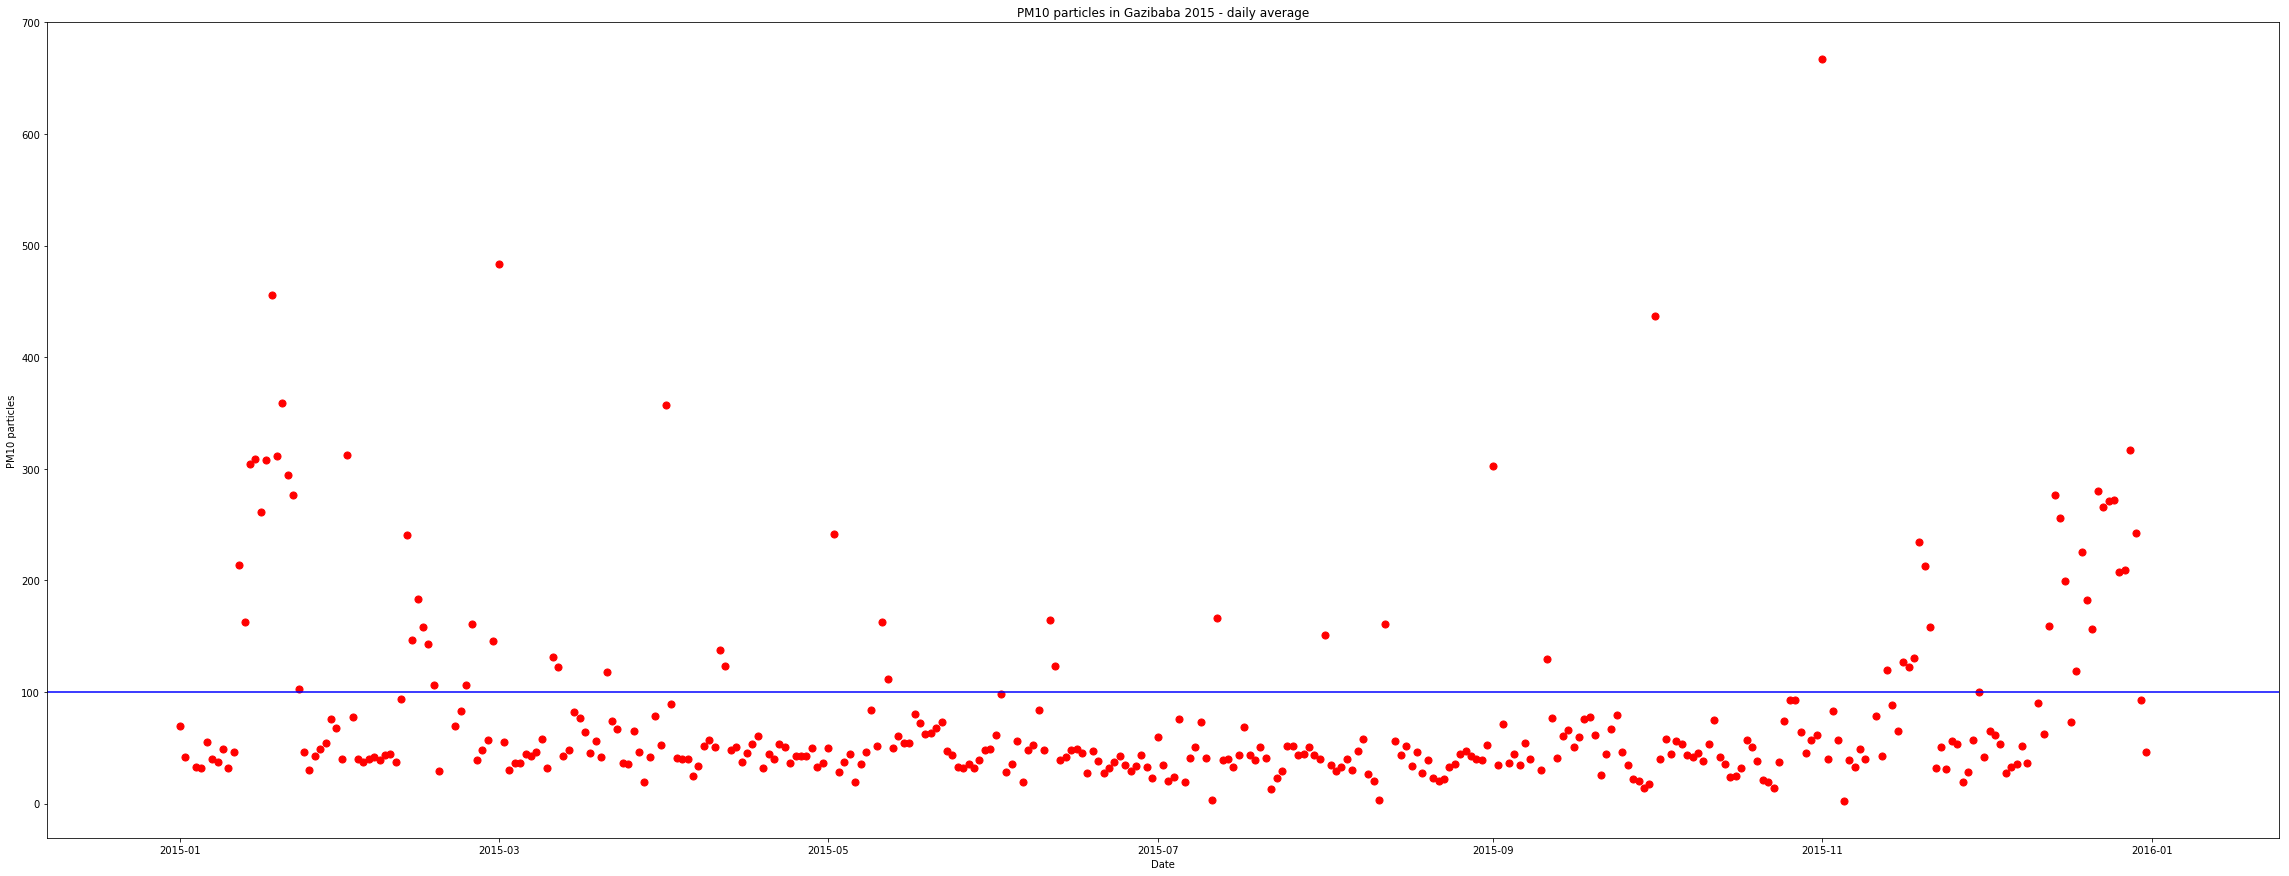

In [76]:


plt.figure(figsize=(40,15))
plt.scatter(x['DateTime'],x['Data'], s =50, c = 'red')
plt.title('PM10 particles in Gazibaba 2015 - daily average')
plt.xlabel('Date')
plt.ylabel('PM10 particles')
plt.axhline(y=100, color='b', linestyle='-')

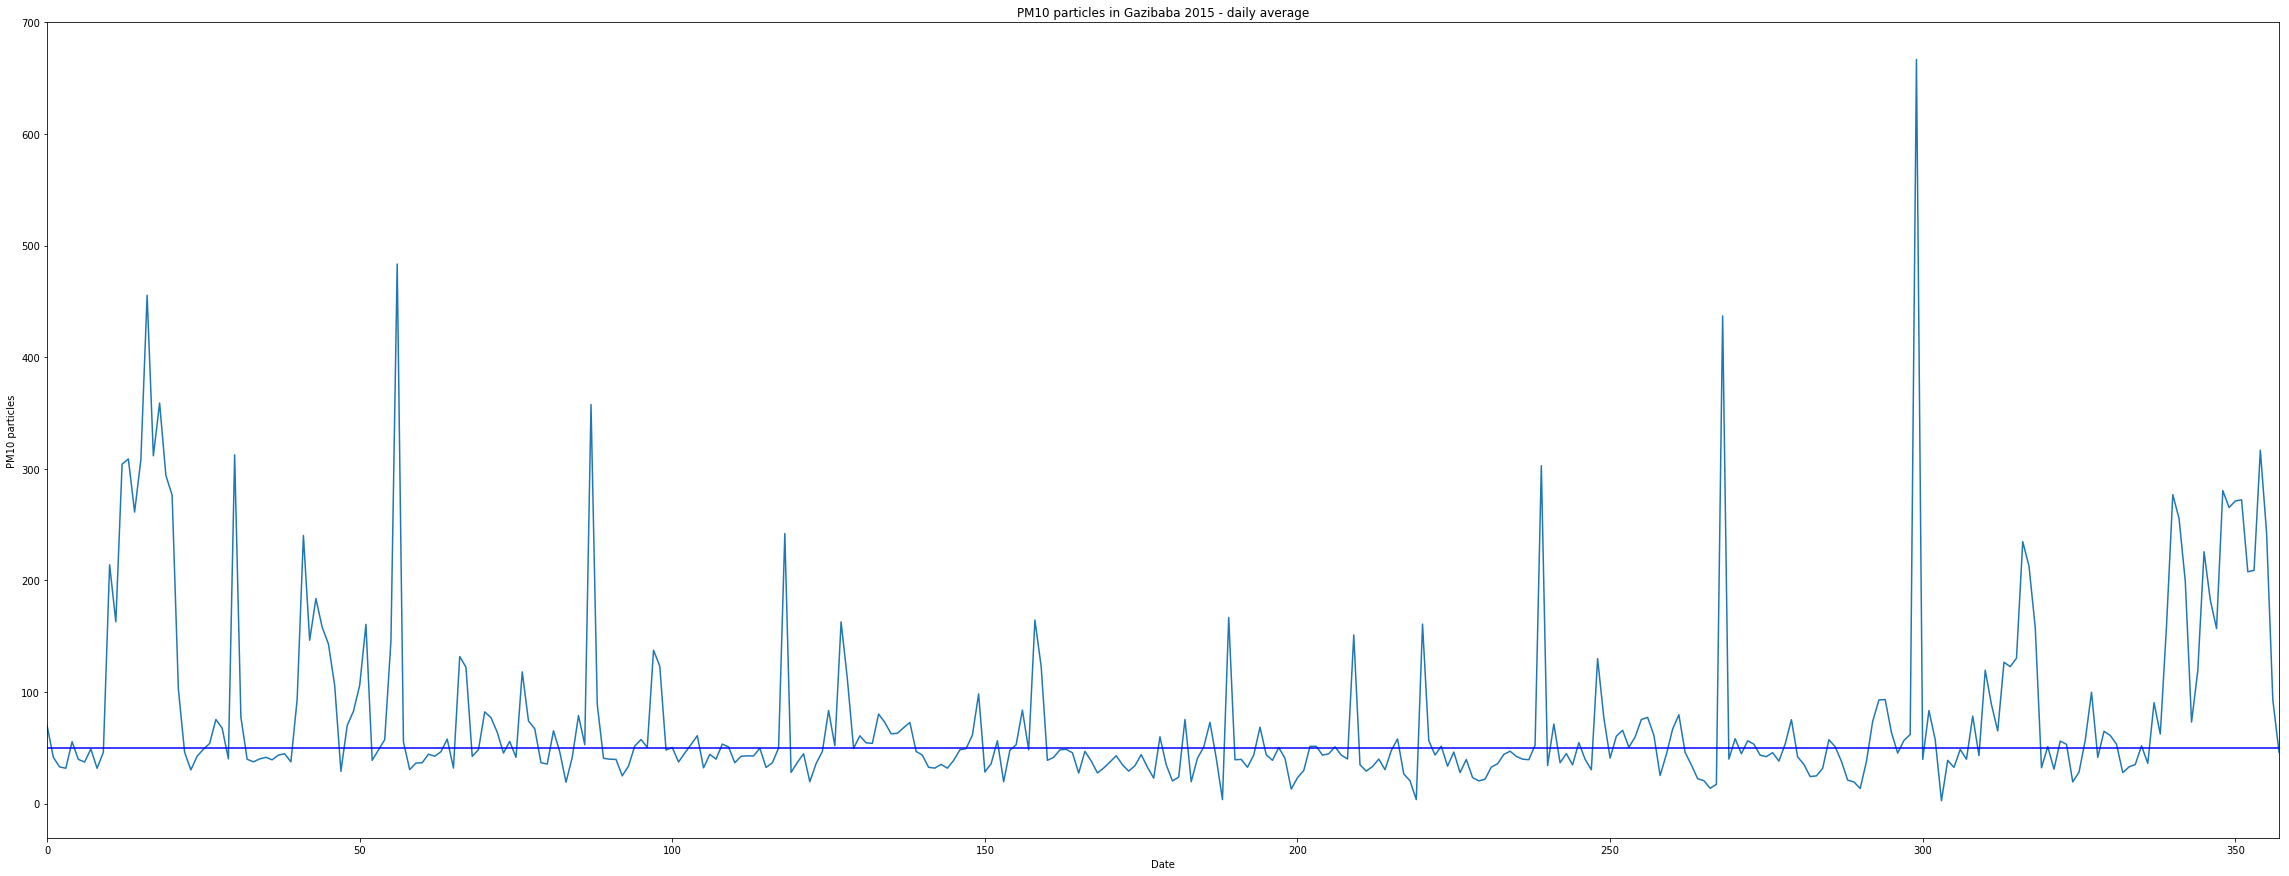

In [81]:
x['Data'].plot(kind='line',stacked=False,figsize=(40,15))
plt.title('PM10 particles in Gazibaba 2015 - daily average')
plt.xlabel('Date')
plt.ylabel('PM10 particles')
plt.axhline(y=50, color='b', linestyle='-')


In [74]:
#xdanger are the days with more than 50 daily average of pm10 particles
xdanger=x[x['Data']>50]
xdanger.head()

,DateTime,Data
0,2015-01-01,69.979583
4,2015-01-06,55.487273
10,2015-01-12,213.978261
11,2015-01-13,162.934583
12,2015-01-14,304.142174


In [75]:
len(xdanger)

166

In [ ]:
#How many days with dangerous levels are on the weekend?

In [26]:
df1=%sql select * from MEASUREMENT_2015 where "StationName" ='Karpos'

Done.


In [27]:
karpos=pd.DataFrame(df1)
karpos.head()

,0,1,2,3,4,5,6,7
0,Karpos,1/1/2015 0:00,0.15,CO,None,None,None,None
1,Karpos,1/1/2015 0:00,9.21,NO2,None,None,None,None
2,Karpos,1/1/2015 0:00,57.36,O3,None,None,None,None
3,Karpos,1/1/2015 0:00,27.59,PM25,None,None,None,None
4,Karpos,1/1/2015 0:00,28.24,PM10,None,None,None,None


In [28]:
karpos.shape

(46562, 8)

In [29]:
columnnames=['StationName','DateTime','Data','Type','Temperature','Humidity','WindSpeed','Percipitation']
karpos.columns=columnnames

In [30]:
karpos.dropna(subset=['Data'],axis=0,inplace=True)

In [31]:
karpos.shape

(36344, 8)

In [32]:
karpos.groupby('Type').count()

,StationName,DateTime,Data,Temperature,Humidity,WindSpeed,Percipitation
Type,,,,,,,
CO,7358,7358,7358,6807,6807,6807,1700
NO2,7395,7395,7395,6843,6843,6843,1697
O3,7396,7396,7396,6845,6845,6845,1701
PM10,7227,7227,7227,6979,6979,6979,1699
PM25,6947,6947,6947,6481,6481,6481,1586
SO2,21,21,21,21,21,21,3


In [34]:

kpm10=karpos[karpos['Type']=='PM10'].reset_index(drop=True)
kpm10.shape

(7227, 8)

In [36]:
karpospm10=kpm10[['DateTime','Data']]
karpospm10["Data"] = pd.to_numeric(karpospm10["Data"],errors='coerce')
karpospm10['DateTime'] = pd.to_datetime(karpospm10['DateTime'])
karpospm10.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,DateTime,Data
0,2015-01-01 00:00:00,28.24
1,2015-01-01 01:00:00,27.29
2,2015-01-01 02:00:00,27.77
3,2015-01-01 03:00:00,27.76
4,2015-01-01 04:00:00,25.33


In [38]:
karpospm10=karpospm10[karpospm10['Data']<1000].reset_index(drop=True)


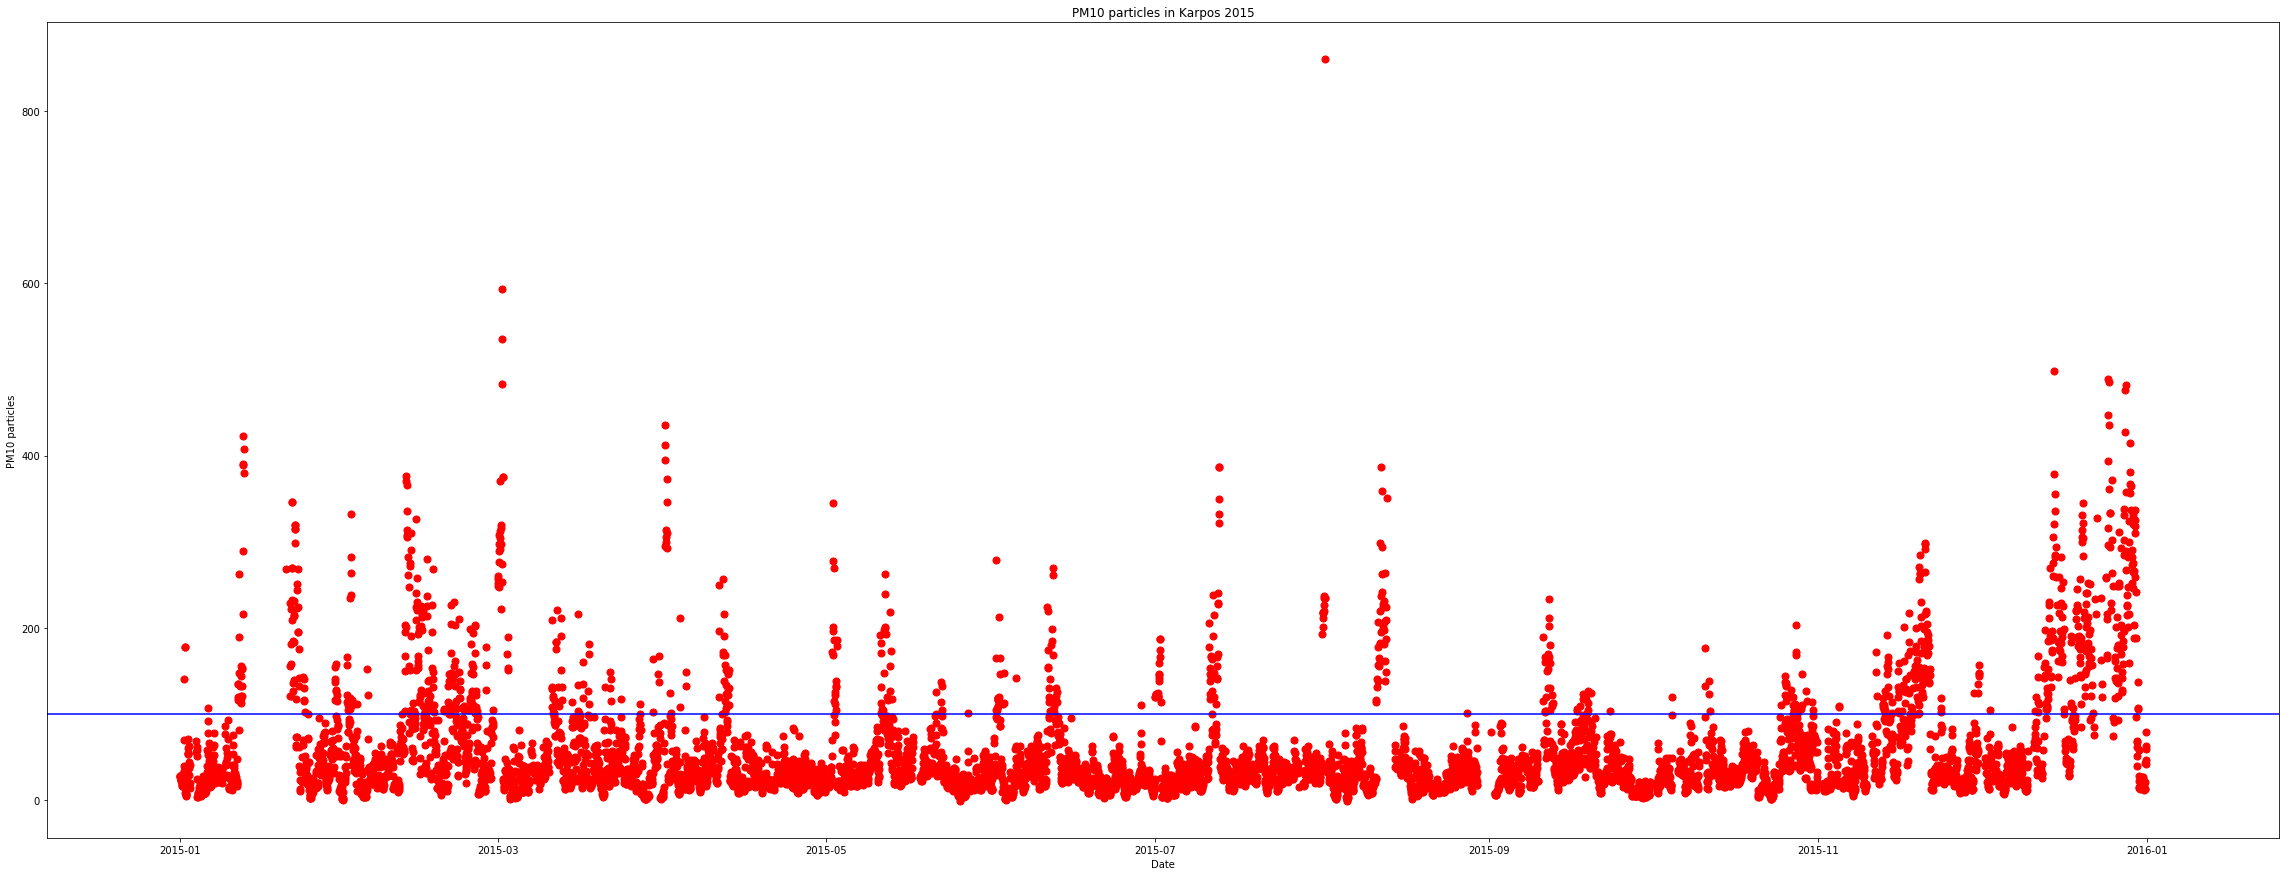

In [41]:
DateTime=karpospm10['DateTime']
Data=karpospm10['Data']

plt.figure(figsize=(40,15))
plt.scatter(DateTime, Data, s =50, c = 'red')
plt.title('PM10 particles in Karpos 2015')
plt.xlabel('Date')
plt.ylabel('PM10 particles')
plt.axhline(y=100, color='b', linestyle='-')

In [40]:
k2015=karpospm10.groupby(karpospm10['DateTime'].dt.date).mean().reset_index()
k2015.head()
k2015['DateTime'] = pd.to_datetime(k2015['DateTime'])
k2015.dtypes

DateTime    datetime64[ns]
Data               float64
dtype: object

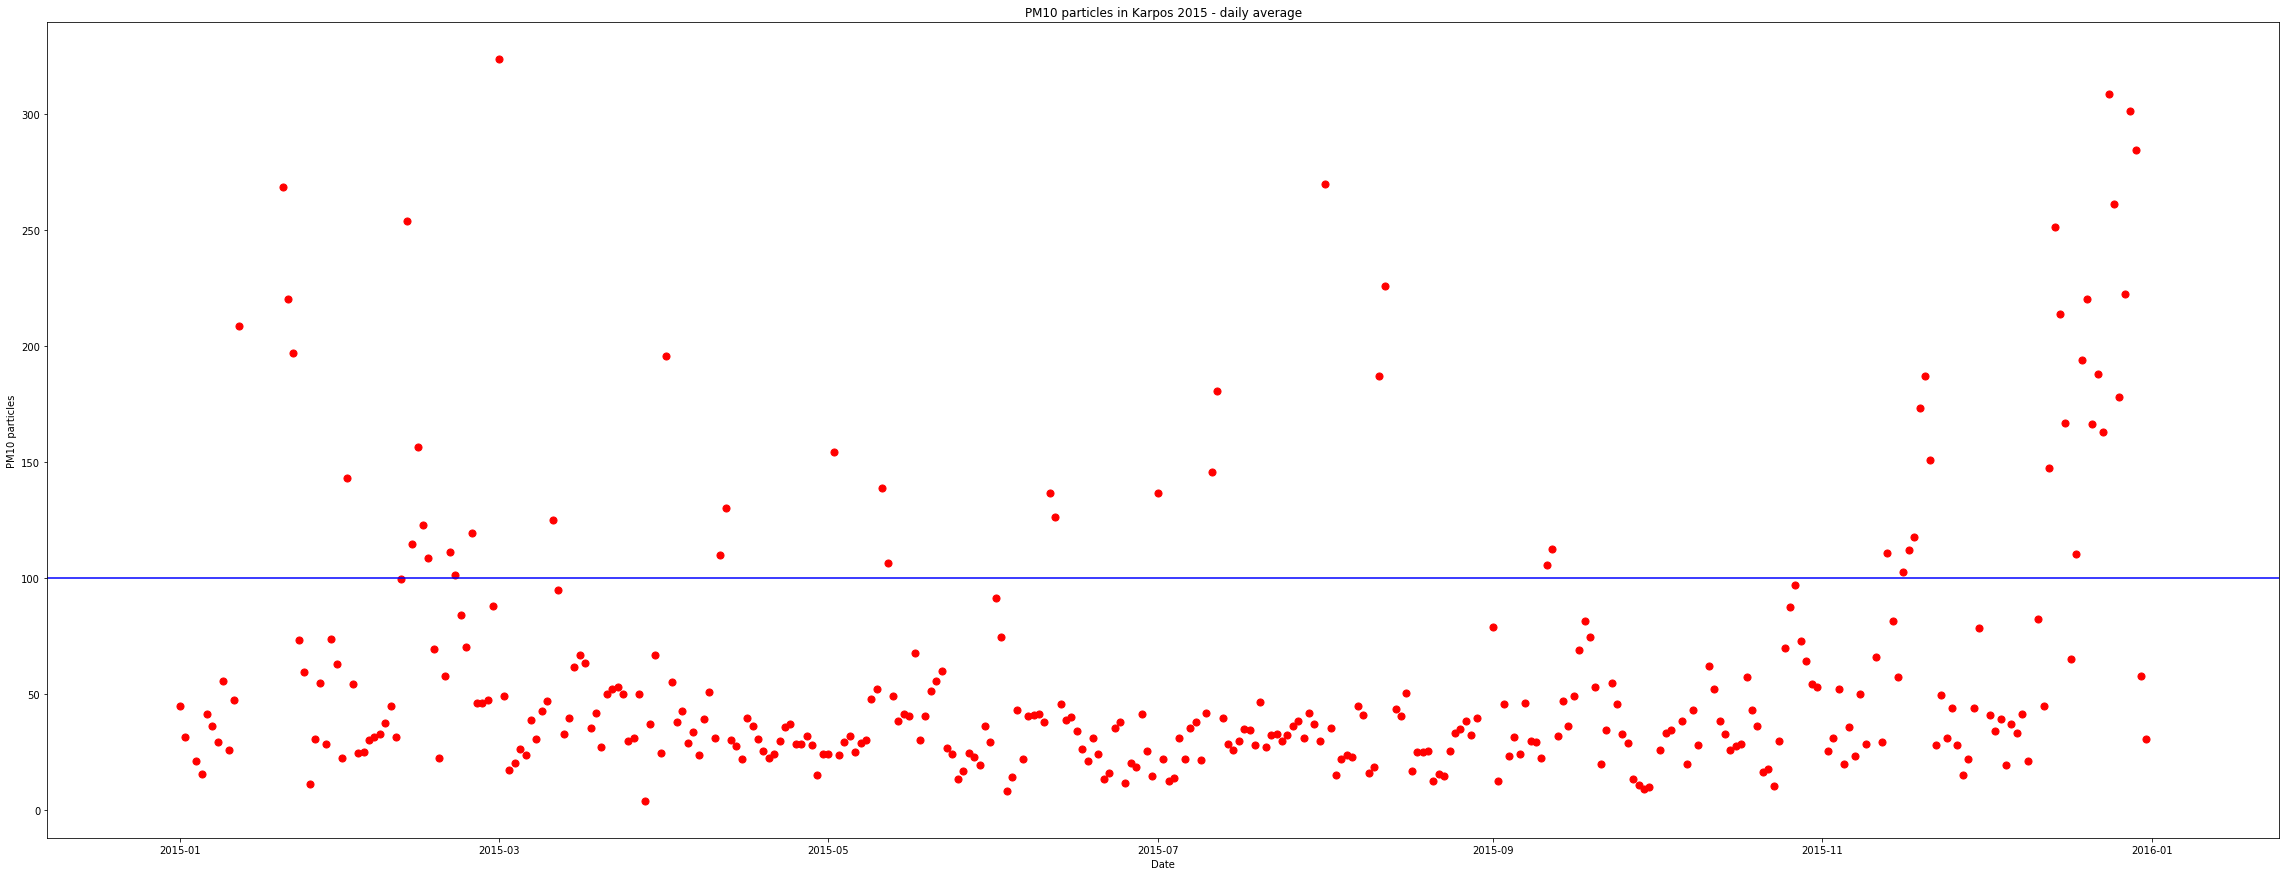

In [42]:
plt.figure(figsize=(40,15))
plt.scatter(k2015['DateTime'],k2015['Data'], s =50, c = 'red')
plt.title('PM10 particles in Karpos 2015 - daily average')
plt.xlabel('Date')
plt.ylabel('PM10 particles')
plt.axhline(y=100, color='b', linestyle='-')

In [44]:
k2015danger=k2015[k2015['Data']>50]
k2015danger.head()

,DateTime,Data
7,2015-01-09,55.584615
10,2015-01-12,208.426522
11,2015-01-20,268.490000
12,2015-01-21,220.193846
13,2015-01-22,196.795417


In [46]:
len(k2015danger)

111